In [1]:
from classes import *
import SessionState
from sklearn.manifold import TSNE

# all plot with size = [20,16]
plt.rcParams['figure.figsize'] = [20, 16]

In [2]:

"""
Simulation parameters
"""
p_sim = {}
p_sim['n_samples'] = 1000
p_sim['n_features'] = 25
#p_sim['beta'] = [0.01 * (p_sim['n_features'] - i) / p_sim['n_features'] for i in range(0, p_sim['n_features'])]


idx = np.arange( p_sim['n_features'])
beta = (-1) ** idx * np.exp(-idx/ 10.)
beta_norm = np.linalg.norm(beta)
p_beta = 1.
p_sim['beta'] = p_beta * beta / beta_norm  #/10  (-1) ** idx * np.exp(-idx/10.)#
# select five 5 features
#p_sim['beta'] = np.array([0.1, -0.1, 0.1, -0.1, 0.1,0.1]+[0.]*(p_sim['n_features']-6))


p_sim['alpha'] = 2#1
p_sim['lamb'] = 1
p_sim['coef_tt'] = .8
p_sim['rho'] =1 # 0.2 #1
p_sim['kappa'] = 3.
p_sim['wd_param'] = 4. #4. # 40



p_sim['path_data'] = "./sim_surv"

"""
Model parameters
"""

p_survcaus = {}
p_survcaus['num_durations'] = 25
p_survcaus['encoded_features'] = 20
p_survcaus['alpha_wass'] = 1
p_survcaus['batch_size'] = 256
p_survcaus['epochs'] = 100
p_survcaus['lr'] = 1e-2
p_survcaus['patience'] = 10



In [3]:
nep = Neptune("test")
nep.create_experiment()
# send parameters to neptune
nep.send_dict(p_sim, "p_sim",num_run=0)
nep.experiment['beta'] = p_sim['beta']


2021-11-21 21:22:17.523 WARNING neptune.internal.hardware.gpu.gpu_monitor: Info (NVML): NVML Shared Library Not Found. GPU usage metrics may not be reported. For more information, see https://docs-legacy.neptune.ai/logging-and-managing-experiment-results/logging-experiment-data.html#hardware-consumption 


https://app.neptune.ai/SurvCaus/RUNS/e/RUN-91
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [4]:
# sin(πXi1Xi2) + 2(Xi3 − 0.5)2 + Xi4 + 0.5Xi5
f1 = lambda x : np.sin(np.pi*x[:,0]*x[:,1] + 2*(x[:,2]-0.5)**2 + x[:,3] + 0.5*x[:,4])

# 2 log(1 + exp(Xi1+Xi2+Xi3 )
f2 = lambda x : np.log(1 + np.exp(x[:,0] + x[:,1] + x[:,2]))

#  (max{Xi1 + Xi2 + Xi3, 0} + max{Xi4 + Xi5, 0}) /2
f3 = lambda x : (np.maximum(x[:,0] + x[:,1] + x[:,2], 0) + np.maximum(x[:,3] + x[:,4], 0)) / 2

#  max{Xi1 + Xi2, Xi3, 0} + max{Xi4 + Xi5, 0}
f4 = lambda x : (np.maximum(x[:,0] + x[:,1], 0) - np.maximum(x[:,3] + x[:,4], 0))


p_sim['scheme'] = Scheme('linear')
#Scheme('linear') #Scheme('nonlinear',f4) # Scheme('nonlinear', f4)


In [5]:
p_survcaus, p_sim 

({'num_durations': 25,
  'encoded_features': 20,
  'alpha_wass': 1,
  'batch_size': 256,
  'epochs': 100,
  'lr': 0.01,
  'patience': 10},
 {'n_samples': 1000,
  'n_features': 25,
  'beta': array([ 0.42719892, -0.38654557,  0.34976089, -0.31647674,  0.28636   ,
         -0.25910924,  0.23445174, -0.2121407 ,  0.19195285, -0.17368612,
          0.1571577 , -0.14220217,  0.12866984, -0.11642529,  0.10534596,
         -0.09532096,  0.08624997, -0.0780422 ,  0.07061551, -0.06389555,
          0.05781509, -0.05231325,  0.04733499, -0.04283047,  0.03875461]),
  'alpha': 2,
  'lamb': 1,
  'coef_tt': 0.8,
  'rho': 1,
  'kappa': 3.0,
  'wd_param': 4.0,
  'path_data': './sim_surv',
  'scheme': <classes.Scheme at 0x7efd0eb1e850>})

In [6]:
simu = SimulationNew(p_sim)
data = simu.simulation_surv()
# send data to neptune
nep.send_data(data, "data",num_run=0)
nep.experiment['Scheme'] = simu.sheme_type
nep.experiment['wd'] = simu.wd
nep.experiment['event=1'] = simu.perc_event
nep.experiment['tt=1']= simu.perc_treatement

WD =  36.56231689453125
tt = 1 : 49 % 
event = 1 : 73 %
Scheme :  linear
Wd_para :  4.0


In [7]:
data#.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,tt,T_f_cens,event,T_1,T_0,T_f,T_cf,Xbeta
0,0.637578,0.637578,0.637578,0.637578,0.637578,0.637578,0.637578,0.637578,0.637578,0.637578,...,0.637578,0.637578,0,0.548927,1,0.697826,0.548927,0.548927,0.697826,-0.330632
1,2.161574,2.161574,2.161574,2.161574,2.161574,2.161574,2.161574,2.161574,2.161574,2.161574,...,2.161574,2.161574,0,0.624383,0,0.486384,1.057539,1.057539,0.486384,0.039211
2,-2.501933,-2.501933,-2.501933,-2.501933,-2.501933,-2.501933,-2.501933,-2.501933,-2.501933,-2.501933,...,-2.501933,-2.501933,1,0.495126,1,0.495126,1.195141,0.495126,1.195141,-0.121809
3,-1.733086,-1.733086,-1.733086,-1.733086,-1.733086,-1.733086,-1.733086,-1.733086,-1.733086,-1.733086,...,-1.733086,-1.733086,1,0.595790,1,0.595790,1.156657,0.595790,1.156657,0.064775
4,-1.811820,-1.811820,-1.811820,-1.811820,-1.811820,-1.811820,-1.811820,-1.811820,-1.811820,-1.811820,...,-1.811820,-1.811820,1,1.439960,1,1.439960,1.209156,1.439960,1.209156,0.045667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.066360,-2.066360,-2.066360,-2.066360,-2.066360,-2.066360,-2.066360,-2.066360,-2.066360,-2.066360,...,-2.066360,-2.066360,1,0.467677,1,0.467677,1.081077,0.467677,1.081077,-0.016104
996,2.263024,2.263024,2.263024,2.263024,2.263024,2.263024,2.263024,2.263024,2.263024,2.263024,...,2.263024,2.263024,0,0.219917,1,0.401842,0.219917,0.219917,0.401842,0.063831
997,-2.807480,-2.807480,-2.807480,-2.807480,-2.807480,-2.807480,-2.807480,-2.807480,-2.807480,-2.807480,...,-2.807480,-2.807480,1,0.220616,0,0.455256,0.617939,0.455256,0.617939,-0.195959
998,0.132013,0.132013,0.132013,0.132013,0.132013,0.132013,0.132013,0.132013,0.132013,0.132013,...,0.132013,0.132013,1,0.184725,0,0.751582,1.037185,0.751582,1.037185,0.517396


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.323988
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.043377


2021-11-21 21:22:29.982 INFO    numexpr.utils: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-11-21 21:22:29.983 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


[t-SNE] KL divergence after 1000 iterations: 0.174766


<ipython-input-8-e7a54b1301e3>:15: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



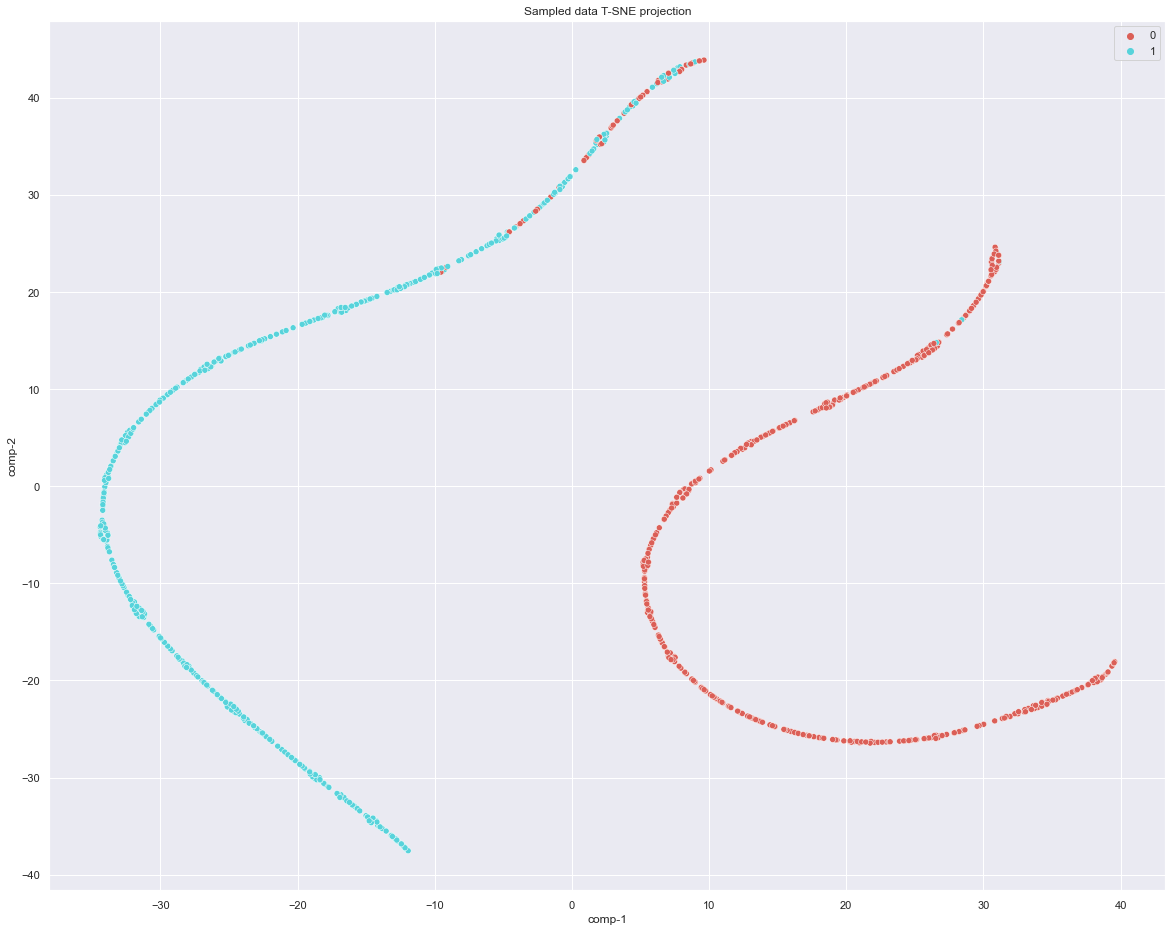

In [8]:
# TSNE

x = data.iloc[:, :p_sim['n_features']]
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
d = pd.DataFrame()
d["tt"] = data[['tt']].values.squeeze()
d["comp-1"] = z[:, 0]
d["comp-2"] = z[:, 1]

fig = plt.figure()
sns.scatterplot(x="comp-1", y="comp-2", hue=d.tt.tolist(),
            palette=sns.color_palette("hls", 2),
            data=d).set(title="Sampled data T-SNE projection")
fig.show()

# send figure to neptune
nep.send_plot(fig, "TSNE initial",num_run=0)


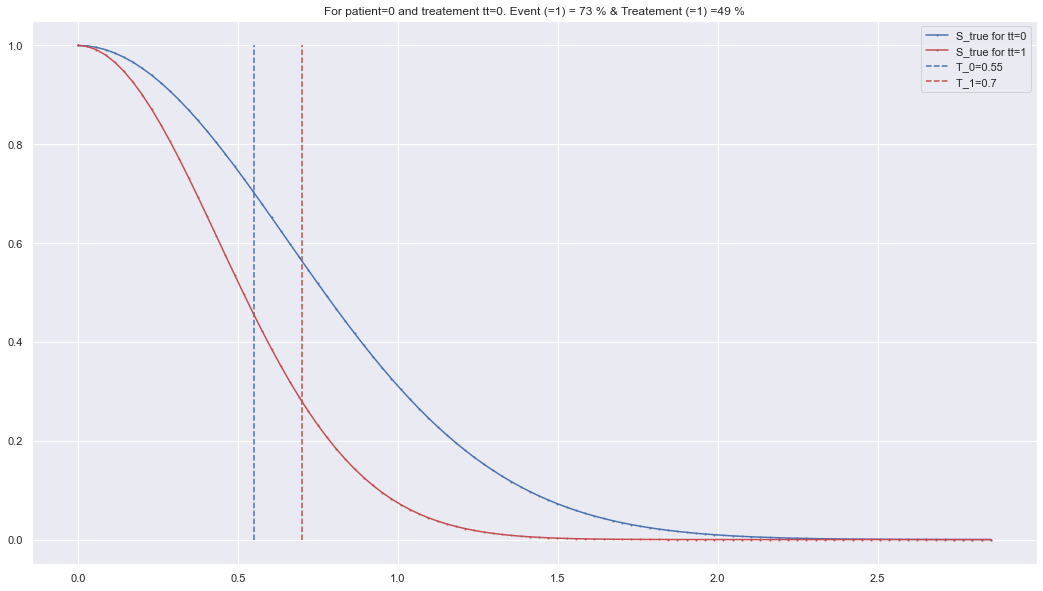

In [9]:
simu.plot_surv_true(patient=0)

# Tunning

In [10]:
#Tunning Survcaus 


tunning = Tunning(p_sim)
n_trials = 10
   
    
p_survcaus_best = tunning.get_best_hyperparameter_survcaus(n_trials=10)


[I 2021-11-21 21:22:31,201] A new study created in memory with name: no-name-df17bed7-757d-45d8-8d2c-6c8ea7ad081e


0:	[0s / 0s],		train_loss: 2.3131,	train_loss_surv: 2.3131,	train_loss_wass: 0.0004,	val_loss: 2.3672,	val_loss_surv: 2.3672,	val_loss_wass: 0.0006
1:	[0s / 0s],		train_loss: 2.2418,	train_loss_surv: 2.2417,	train_loss_wass: 0.0009,	val_loss: 2.3589,	val_loss_surv: 2.3589,	val_loss_wass: 0.0006
2:	[0s / 1s],		train_loss: 2.2569,	train_loss_surv: 2.2568,	train_loss_wass: 0.0009,	val_loss: 2.3488,	val_loss_surv: 2.3487,	val_loss_wass: 0.0008
3:	[0s / 1s],		train_loss: 2.2133,	train_loss_surv: 2.2132,	train_loss_wass: 0.0010,	val_loss: 2.3417,	val_loss_surv: 2.3417,	val_loss_wass: 0.0010
4:	[0s / 2s],		train_loss: 2.2077,	train_loss_surv: 2.2075,	train_loss_wass: 0.0014,	val_loss: 2.3363,	val_loss_surv: 2.3362,	val_loss_wass: 0.0015
5:	[0s / 3s],		train_loss: 2.1743,	train_loss_surv: 2.1741,	train_loss_wass: 0.0018,	val_loss: 2.3266,	val_loss_surv: 2.3264,	val_loss_wass: 0.0019
6:	[0s / 4s],		train_loss: 2.2340,	train_loss_surv: 2.2338,	train_loss_wass: 0.0026,	val_loss: 2.3132,	val_loss_

  2%|▏         | 4/200 [00:00<00:08, 24.17it/s]

14:	[1s / 16s],		train_loss: 2.1535,	train_loss_surv: 2.1532,	train_loss_wass: 0.0037,	val_loss: 2.3032,	val_loss_surv: 2.3031,	val_loss_wass: 0.0018


100%|██████████| 200/200 [00:00<00:00, 478.03it/s]
[I 2021-11-21 21:22:48,940] Trial 0 finished with value: 0.04654621696884908 and parameters: {'num_durations': 21, 'encoded_features': 15, 'alpha_wass': 0.07997366116444737, 'lr': 0.004028175638385355}. Best is trial 0 with value: 0.04654621696884908.


0:	[0s / 0s],		train_loss: 2.5053,	train_loss_surv: 2.5052,	train_loss_wass: 0.0021,	val_loss: 2.5778,	val_loss_surv: 2.5777,	val_loss_wass: 0.0023
1:	[0s / 0s],		train_loss: 2.4632,	train_loss_surv: 2.4630,	train_loss_wass: 0.0038,	val_loss: 2.5679,	val_loss_surv: 2.5677,	val_loss_wass: 0.0071
2:	[0s / 1s],		train_loss: 2.3414,	train_loss_surv: 2.3411,	train_loss_wass: 0.0099,	val_loss: 2.5598,	val_loss_surv: 2.5595,	val_loss_wass: 0.0084
3:	[1s / 2s],		train_loss: 2.3939,	train_loss_surv: 2.3936,	train_loss_wass: 0.0092,	val_loss: 2.5504,	val_loss_surv: 2.5501,	val_loss_wass: 0.0070
4:	[1s / 3s],		train_loss: 2.3505,	train_loss_surv: 2.3502,	train_loss_wass: 0.0090,	val_loss: 2.5424,	val_loss_surv: 2.5422,	val_loss_wass: 0.0080
5:	[1s / 5s],		train_loss: 2.3894,	train_loss_surv: 2.3891,	train_loss_wass: 0.0107,	val_loss: 2.5316,	val_loss_surv: 2.5313,	val_loss_wass: 0.0096
6:	[0s / 5s],		train_loss: 2.3384,	train_loss_surv: 2.3380,	train_loss_wass: 0.0109,	val_loss: 2.5225,	val_loss_

 42%|████▏     | 84/200 [00:00<00:00, 834.03it/s]

15:	[1s / 17s],		train_loss: 2.3132,	train_loss_surv: 2.3122,	train_loss_wass: 0.0303,	val_loss: 2.5837,	val_loss_surv: 2.5830,	val_loss_wass: 0.0224


100%|██████████| 200/200 [00:00<00:00, 831.26it/s]
[I 2021-11-21 21:23:06,807] Trial 1 finished with value: 0.06045284705236445 and parameters: {'num_durations': 26, 'encoded_features': 26, 'alpha_wass': 0.03111034776984081, 'lr': 0.0050437956100639865}. Best is trial 0 with value: 0.04654621696884908.


0:	[0s / 0s],		train_loss: 2.6282,	train_loss_surv: 2.6281,	train_loss_wass: 0.0006,	val_loss: 2.7228,	val_loss_surv: 2.7228,	val_loss_wass: 0.0012
1:	[1s / 1s],		train_loss: 2.5604,	train_loss_surv: 2.5603,	train_loss_wass: 0.0015,	val_loss: 2.7202,	val_loss_surv: 2.7202,	val_loss_wass: 0.0014
2:	[2s / 4s],		train_loss: 2.5142,	train_loss_surv: 2.5142,	train_loss_wass: 0.0015,	val_loss: 2.7160,	val_loss_surv: 2.7160,	val_loss_wass: 0.0013
3:	[1s / 5s],		train_loss: 2.5027,	train_loss_surv: 2.5026,	train_loss_wass: 0.0021,	val_loss: 2.7107,	val_loss_surv: 2.7107,	val_loss_wass: 0.0012
4:	[1s / 7s],		train_loss: 2.4203,	train_loss_surv: 2.4203,	train_loss_wass: 0.0020,	val_loss: 2.7049,	val_loss_surv: 2.7048,	val_loss_wass: 0.0014
5:	[1s / 8s],		train_loss: 2.4484,	train_loss_surv: 2.4483,	train_loss_wass: 0.0026,	val_loss: 2.6969,	val_loss_surv: 2.6968,	val_loss_wass: 0.0015
6:	[1s / 9s],		train_loss: 2.4173,	train_loss_surv: 2.4173,	train_loss_wass: 0.0020,	val_loss: 2.6885,	val_loss_

 33%|███▎      | 66/200 [00:00<00:00, 655.18it/s]

16:	[1s / 25s],		train_loss: 2.3771,	train_loss_surv: 2.3771,	train_loss_wass: 0.0022,	val_loss: 2.7006,	val_loss_surv: 2.7005,	val_loss_wass: 0.0016


100%|██████████| 200/200 [00:00<00:00, 697.26it/s]
[I 2021-11-21 21:23:33,177] Trial 2 finished with value: 0.06380755101354002 and parameters: {'num_durations': 30, 'encoded_features': 15, 'alpha_wass': 0.020837320642125064, 'lr': 0.002584128233580282}. Best is trial 0 with value: 0.04654621696884908.


0:	[0s / 0s],		train_loss: 2.4253,	train_loss_surv: 2.4253,	train_loss_wass: 0.0005,	val_loss: 2.4691,	val_loss_surv: 2.4691,	val_loss_wass: 0.0005
1:	[0s / 0s],		train_loss: 2.3984,	train_loss_surv: 2.3984,	train_loss_wass: 0.0004,	val_loss: 2.4695,	val_loss_surv: 2.4695,	val_loss_wass: 0.0005
2:	[0s / 0s],		train_loss: 2.3696,	train_loss_surv: 2.3695,	train_loss_wass: 0.0006,	val_loss: 2.4681,	val_loss_surv: 2.4681,	val_loss_wass: 0.0005
3:	[0s / 1s],		train_loss: 2.3778,	train_loss_surv: 2.3778,	train_loss_wass: 0.0004,	val_loss: 2.4650,	val_loss_surv: 2.4650,	val_loss_wass: 0.0005
4:	[0s / 1s],		train_loss: 2.2471,	train_loss_surv: 2.2470,	train_loss_wass: 0.0007,	val_loss: 2.4602,	val_loss_surv: 2.4602,	val_loss_wass: 0.0005
5:	[0s / 1s],		train_loss: 2.2843,	train_loss_surv: 2.2843,	train_loss_wass: 0.0006,	val_loss: 2.4545,	val_loss_surv: 2.4544,	val_loss_wass: 0.0005
6:	[0s / 2s],		train_loss: 2.3275,	train_loss_surv: 2.3274,	train_loss_wass: 0.0005,	val_loss: 2.4476,	val_loss_

100%|██████████| 200/200 [00:00<00:00, 1192.76it/s]
[I 2021-11-21 21:23:42,112] Trial 3 finished with value: 0.04178010059934864 and parameters: {'num_durations': 23, 'encoded_features': 10, 'alpha_wass': 0.03685623772502398, 'lr': 0.0014327012550469109}. Best is trial 3 with value: 0.04178010059934864.


19:	[0s / 8s],		train_loss: 2.2225,	train_loss_surv: 2.2224,	train_loss_wass: 0.0011,	val_loss: 2.3621,	val_loss_surv: 2.3620,	val_loss_wass: 0.0010
0:	[0s / 0s],		train_loss: 2.3709,	train_loss_surv: 2.3709,	train_loss_wass: 0.0025,	val_loss: 2.3941,	val_loss_surv: 2.3941,	val_loss_wass: 0.0024
1:	[0s / 0s],		train_loss: 2.3291,	train_loss_surv: 2.3291,	train_loss_wass: 0.0025,	val_loss: 2.3912,	val_loss_surv: 2.3911,	val_loss_wass: 0.0030
2:	[0s / 0s],		train_loss: 2.3096,	train_loss_surv: 2.3096,	train_loss_wass: 0.0028,	val_loss: 2.3881,	val_loss_surv: 2.3881,	val_loss_wass: 0.0043
3:	[0s / 1s],		train_loss: 2.2737,	train_loss_surv: 2.2736,	train_loss_wass: 0.0054,	val_loss: 2.3838,	val_loss_surv: 2.3837,	val_loss_wass: 0.0061
4:	[0s / 2s],		train_loss: 2.2611,	train_loss_surv: 2.2609,	train_loss_wass: 0.0091,	val_loss: 2.3787,	val_loss_surv: 2.3786,	val_loss_wass: 0.0080
5:	[1s / 3s],		train_loss: 2.2022,	train_loss_surv: 2.2021,	train_loss_wass: 0.0093,	val_loss: 2.3721,	val_loss

100%|██████████| 200/200 [00:00<00:00, 1235.25it/s]
[I 2021-11-21 21:23:54,354] Trial 4 finished with value: 0.060339862062796144 and parameters: {'num_durations': 22, 'encoded_features': 28, 'alpha_wass': 0.016359701191671842, 'lr': 0.003021324099329654}. Best is trial 3 with value: 0.04178010059934864.


17:	[0s / 11s],		train_loss: 2.1439,	train_loss_surv: 2.1437,	train_loss_wass: 0.0127,	val_loss: 2.3309,	val_loss_surv: 2.3307,	val_loss_wass: 0.0123
0:	[0s / 0s],		train_loss: 2.6200,	train_loss_surv: 2.6199,	train_loss_wass: 0.0011,	val_loss: 2.5902,	val_loss_surv: 2.5902,	val_loss_wass: 0.0009
1:	[0s / 0s],		train_loss: 2.5795,	train_loss_surv: 2.5795,	train_loss_wass: 0.0016,	val_loss: 2.5886,	val_loss_surv: 2.5886,	val_loss_wass: 0.0013
2:	[0s / 0s],		train_loss: 2.5820,	train_loss_surv: 2.5819,	train_loss_wass: 0.0018,	val_loss: 2.5862,	val_loss_surv: 2.5861,	val_loss_wass: 0.0016
3:	[0s / 0s],		train_loss: 2.5150,	train_loss_surv: 2.5149,	train_loss_wass: 0.0024,	val_loss: 2.5817,	val_loss_surv: 2.5817,	val_loss_wass: 0.0019
4:	[0s / 0s],		train_loss: 2.4609,	train_loss_surv: 2.4608,	train_loss_wass: 0.0022,	val_loss: 2.5758,	val_loss_surv: 2.5758,	val_loss_wass: 0.0021
5:	[0s / 1s],		train_loss: 2.5027,	train_loss_surv: 2.5026,	train_loss_wass: 0.0032,	val_loss: 2.5693,	val_los

100%|██████████| 200/200 [00:00<00:00, 1202.79it/s]
[I 2021-11-21 21:24:00,192] Trial 5 finished with value: 0.04983779215643567 and parameters: {'num_durations': 30, 'encoded_features': 21, 'alpha_wass': 0.02729839913650575, 'lr': 0.0022576046794445465}. Best is trial 3 with value: 0.04178010059934864.


16:	[0s / 5s],		train_loss: 2.3799,	train_loss_surv: 2.3798,	train_loss_wass: 0.0044,	val_loss: 2.5485,	val_loss_surv: 2.5484,	val_loss_wass: 0.0035
0:	[0s / 0s],		train_loss: 2.5164,	train_loss_surv: 2.5164,	train_loss_wass: 0.0009,	val_loss: 2.6348,	val_loss_surv: 2.6348,	val_loss_wass: 0.0006
1:	[0s / 0s],		train_loss: 2.4865,	train_loss_surv: 2.4865,	train_loss_wass: 0.0007,	val_loss: 2.6337,	val_loss_surv: 2.6337,	val_loss_wass: 0.0007
2:	[0s / 0s],		train_loss: 2.4801,	train_loss_surv: 2.4801,	train_loss_wass: 0.0008,	val_loss: 2.6324,	val_loss_surv: 2.6324,	val_loss_wass: 0.0008
3:	[0s / 0s],		train_loss: 2.5006,	train_loss_surv: 2.5005,	train_loss_wass: 0.0019,	val_loss: 2.6299,	val_loss_surv: 2.6299,	val_loss_wass: 0.0008
4:	[0s / 1s],		train_loss: 2.4550,	train_loss_surv: 2.4549,	train_loss_wass: 0.0022,	val_loss: 2.6267,	val_loss_surv: 2.6266,	val_loss_wass: 0.0010
5:	[0s / 1s],		train_loss: 2.4334,	train_loss_surv: 2.4334,	train_loss_wass: 0.0017,	val_loss: 2.6233,	val_loss

100%|██████████| 200/200 [00:00<00:00, 1099.27it/s]
[I 2021-11-21 21:24:07,575] Trial 6 finished with value: 0.044933268557870006 and parameters: {'num_durations': 26, 'encoded_features': 20, 'alpha_wass': 0.02284746927266737, 'lr': 0.0015038707273038955}. Best is trial 3 with value: 0.04178010059934864.


19:	[0s / 7s],		train_loss: 2.3320,	train_loss_surv: 2.3319,	train_loss_wass: 0.0017,	val_loss: 2.5382,	val_loss_surv: 2.5382,	val_loss_wass: 0.0013
0:	[0s / 0s],		train_loss: 2.3016,	train_loss_surv: 2.3015,	train_loss_wass: 0.0032,	val_loss: 2.4141,	val_loss_surv: 2.4140,	val_loss_wass: 0.0079
1:	[2s / 2s],		train_loss: 2.2618,	train_loss_surv: 2.2616,	train_loss_wass: 0.0203,	val_loss: 2.4016,	val_loss_surv: 2.4013,	val_loss_wass: 0.0206
2:	[1s / 4s],		train_loss: 2.2006,	train_loss_surv: 2.1998,	train_loss_wass: 0.0615,	val_loss: 2.4024,	val_loss_surv: 2.4019,	val_loss_wass: 0.0359
3:	[1s / 6s],		train_loss: 2.2072,	train_loss_surv: 2.2064,	train_loss_wass: 0.0663,	val_loss: 2.4224,	val_loss_surv: 2.4210,	val_loss_wass: 0.1173
4:	[1s / 7s],		train_loss: 2.1571,	train_loss_surv: 2.1555,	train_loss_wass: 0.1348,	val_loss: 2.4505,	val_loss_surv: 2.4494,	val_loss_wass: 0.0930


 46%|████▋     | 93/200 [00:00<00:00, 919.74it/s]

5:	[1s / 8s],		train_loss: 2.1430,	train_loss_surv: 2.1417,	train_loss_wass: 0.1080,	val_loss: 2.4372,	val_loss_surv: 2.4363,	val_loss_wass: 0.0709


100%|██████████| 200/200 [00:00<00:00, 911.07it/s]
[I 2021-11-21 21:24:16,418] Trial 7 finished with value: 0.08093040807447305 and parameters: {'num_durations': 20, 'encoded_features': 27, 'alpha_wass': 0.011974878036227907, 'lr': 0.009254113046773892}. Best is trial 3 with value: 0.04178010059934864.


0:	[0s / 0s],		train_loss: 2.4828,	train_loss_surv: 2.4828,	train_loss_wass: 0.0005,	val_loss: 2.7025,	val_loss_surv: 2.7025,	val_loss_wass: 0.0002
1:	[0s / 0s],		train_loss: 2.4592,	train_loss_surv: 2.4592,	train_loss_wass: 0.0005,	val_loss: 2.7027,	val_loss_surv: 2.7027,	val_loss_wass: 0.0003
2:	[0s / 0s],		train_loss: 2.4375,	train_loss_surv: 2.4375,	train_loss_wass: 0.0005,	val_loss: 2.7030,	val_loss_surv: 2.7030,	val_loss_wass: 0.0003
3:	[0s / 0s],		train_loss: 2.3964,	train_loss_surv: 2.3964,	train_loss_wass: 0.0004,	val_loss: 2.7036,	val_loss_surv: 2.7036,	val_loss_wass: 0.0003


 50%|█████     | 101/200 [00:00<00:00, 1001.70it/s]

4:	[0s / 0s],		train_loss: 2.4277,	train_loss_surv: 2.4277,	train_loss_wass: 0.0005,	val_loss: 2.7040,	val_loss_surv: 2.7040,	val_loss_wass: 0.0003


100%|██████████| 200/200 [00:00<00:00, 1037.86it/s]
[I 2021-11-21 21:24:17,012] Trial 8 finished with value: 0.08189781541419171 and parameters: {'num_durations': 25, 'encoded_features': 10, 'alpha_wass': 0.029681658041304942, 'lr': 0.0003244119864591472}. Best is trial 3 with value: 0.04178010059934864.


0:	[0s / 0s],		train_loss: 2.6457,	train_loss_surv: 2.6456,	train_loss_wass: 0.0005,	val_loss: 2.6406,	val_loss_surv: 2.6405,	val_loss_wass: 0.0006
1:	[0s / 0s],		train_loss: 2.6339,	train_loss_surv: 2.6339,	train_loss_wass: 0.0006,	val_loss: 2.6440,	val_loss_surv: 2.6440,	val_loss_wass: 0.0006
2:	[0s / 0s],		train_loss: 2.6244,	train_loss_surv: 2.6244,	train_loss_wass: 0.0006,	val_loss: 2.6471,	val_loss_surv: 2.6471,	val_loss_wass: 0.0006
3:	[0s / 1s],		train_loss: 2.5740,	train_loss_surv: 2.5739,	train_loss_wass: 0.0005,	val_loss: 2.6495,	val_loss_surv: 2.6495,	val_loss_wass: 0.0006


 42%|████▎     | 85/200 [00:00<00:00, 848.37it/s]

4:	[0s / 1s],		train_loss: 2.5910,	train_loss_surv: 2.5910,	train_loss_wass: 0.0005,	val_loss: 2.6516,	val_loss_surv: 2.6515,	val_loss_wass: 0.0006


100%|██████████| 200/200 [00:00<00:00, 850.59it/s]
[I 2021-11-21 21:24:18,732] Trial 9 finished with value: 0.08170315427653096 and parameters: {'num_durations': 30, 'encoded_features': 16, 'alpha_wass': 0.024226131069417275, 'lr': 0.0001752031228295527}. Best is trial 3 with value: 0.04178010059934864.


In [11]:
# Tunning BART 

p_bart_best = tunning.get_best_hyperparameter_bart(n_trials=1)
            

[I 2021-11-21 21:24:18,758] A new study created in memory with name: no-name-37832a56-b2cc-4cdf-b63e-9f6811740e4e
100%|██████████| 200/200 [00:01<00:00, 108.69it/s]
[I 2021-11-21 21:24:20,864] Trial 0 finished with value: 0.05804754673145083 and parameters: {'num_trees': 12, 'max_features': 'sqrt', 'max_depth': 10, 'alpha': 0.1458333019987633}. Best is trial 0 with value: 0.05804754673145083.


# Training 

In [12]:

p_survcaus = p_survcaus_best.copy()

p_survcaus['patience'] = 2
p_survcaus['epochs'] = 20
p_survcaus['batch_size'] = 256
p_survcaus['num_durations'] = 25 #20
p_survcaus['encoded_features'] =12
    
print("Best hyperparameter for survcaus : ", p_survcaus)
print("Best hyperparameter for BART : ", p_bart_best)
    
Ev = Evaluation(p_sim, p_survcaus)


list_models =  ["SurvCaus", "SurvCaus_0",'BART', 'CoxPH','DeepSurv','EST','RSF']
print("Choosed models : ", list_models)

nep.send_dict(p_survcaus, "p_survcaus",num_run=0)
nep.send_dict(p_bart_best, "p_bart_best",num_run=0)

Best hyperparameter for survcaus :  {'num_durations': 25, 'encoded_features': 12, 'alpha_wass': 0.03685623772502398, 'lr': 0.0014327012550469109, 'patience': 2, 'epochs': 20, 'batch_size': 256}
Best hyperparameter for BART :  {'num_trees': 12, 'max_features': 'sqrt', 'max_depth': 10, 'alpha': 0.1458333019987633}
Choosed models :  ['SurvCaus', 'SurvCaus_0', 'BART', 'CoxPH', 'DeepSurv', 'EST', 'RSF']


SurvCaus
{'num_durations': 25, 'encoded_features': 12, 'alpha_wass': 0.03685623772502398, 'lr': 0.0014327012550469109, 'patience': 2, 'epochs': 20, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 2.4898,	train_loss_surv: 2.4898,	train_loss_wass: 0.0002,	val_loss: 2.5645,	val_loss_surv: 2.5645,	val_loss_wass: 0.0003
1:	[0s / 0s],		train_loss: 2.3980,	train_loss_surv: 2.3980,	train_loss_wass: 0.0003,	val_loss: 2.5637,	val_loss_surv: 2.5637,	val_loss_wass: 0.0003
2:	[0s / 0s],		train_loss: 2.3636,	train_loss_surv: 2.3636,	train_loss_wass: 0.0004,	val_loss: 2.5628,	val_loss_surv: 2.5628,	val_loss_wass: 0.0003
3:	[0s / 0s],		train_loss: 2.3976,	train_loss_surv: 2.3976,	train_loss_wass: 0.0003,	val_loss: 2.5610,	val_loss_surv: 2.5610,	val_loss_wass: 0.0003
4:	[0s / 0s],		train_loss: 2.3801,	train_loss_surv: 2.3801,	train_loss_wass: 0.0003,	val_loss: 2.5583,	val_loss_surv: 2.5583,	val_loss_wass: 0.0003
5:	[0s / 0s],		train_loss: 2.3897,	train_loss_surv: 2.3897,	train_loss_wass: 0.0005,	val_loss

 42%|████▎     | 85/200 [00:00<00:00, 840.97it/s]

19:	[0s / 4s],		train_loss: 2.3404,	train_loss_surv: 2.3404,	train_loss_wass: 0.0014,	val_loss: 2.4868,	val_loss_surv: 2.4867,	val_loss_wass: 0.0014


100%|██████████| 200/200 [00:00<00:00, 913.43it/s]


SurvCaus_0
{'num_durations': 25, 'encoded_features': 12, 'alpha_wass': 0.0, 'lr': 0.0014327012550469109, 'patience': 2, 'epochs': 20, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 2.4961,	train_loss_surv: 2.4961,	train_loss_wass: 0.0008,	val_loss: 2.6081,	val_loss_surv: 2.6081,	val_loss_wass: 0.0003
1:	[0s / 0s],		train_loss: 2.4519,	train_loss_surv: 2.4519,	train_loss_wass: 0.0007,	val_loss: 2.6053,	val_loss_surv: 2.6053,	val_loss_wass: 0.0003
2:	[0s / 0s],		train_loss: 2.4033,	train_loss_surv: 2.4033,	train_loss_wass: 0.0005,	val_loss: 2.6030,	val_loss_surv: 2.6030,	val_loss_wass: 0.0003
3:	[0s / 0s],		train_loss: 2.3506,	train_loss_surv: 2.3506,	train_loss_wass: 0.0004,	val_loss: 2.6001,	val_loss_surv: 2.6001,	val_loss_wass: 0.0003
4:	[0s / 0s],		train_loss: 2.3900,	train_loss_surv: 2.3900,	train_loss_wass: 0.0003,	val_loss: 2.5968,	val_loss_surv: 2.5968,	val_loss_wass: 0.0003
5:	[0s / 0s],		train_loss: 2.3168,	train_loss_surv: 2.3168,	train_loss_wass: 0.0005,	val_loss: 2.5925,	val_

 32%|███▎      | 65/200 [00:00<00:00, 640.25it/s]

19:	[0s / 2s],		train_loss: 2.3473,	train_loss_surv: 2.3473,	train_loss_wass: 0.0011,	val_loss: 2.5455,	val_loss_surv: 2.5455,	val_loss_wass: 0.0008


100%|██████████| 200/200 [00:00<00:00, 741.65it/s]


BART


100%|██████████| 200/200 [00:00<00:00, 657.04it/s]


CoxPH
Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 1051.321 - ||grad||^2 = 1062.86114
 * Iteration #2 - Loss = 1006.998 - ||grad||^2 = 949.62773
 * Iteration #3 - Loss = 975.738 - ||grad||^2 = 850.03840
 * Iteration #4 - Loss = 952.919 - ||grad||^2 = 761.85995
 * Iteration #5 - Loss = 935.861 - ||grad||^2 = 683.45673
 * Iteration #6 - Loss = 922.884 - ||grad||^2 = 613.54302
 * Iteration #7 - Loss = 912.881 - ||grad||^2 = 551.06880
 * Iteration #8 - Loss = 905.093 - ||grad||^2 = 495.15539
 * Iteration #9 - Loss = 898.982 - ||grad||^2 = 445.05479
 * Iteration #10 - Loss = 894.158 - ||grad||^2 = 400.12214
 * Iteration #11 - Loss = 890.331 - ||grad||^2 = 359.79617
 * Iteration #12 - Loss = 887.283 - ||grad||^2 = 323.58482
 * Iteration #13 - Loss = 884.850 - ||grad||^2 = 291.05431
 * Iteration #14 - Loss = 882.901 - ||grad||^2 = 261.82054
 * Iteration #15 - Loss = 881.338 - ||grad||^2 = 235.54230
 * Iteration #16 - Loss = 880.081 - ||grad||^2 = 211.91566
 * Iteration #17 

  0%|          | 0/200 [00:00<?, ?it/s]2021-11-21 21:24:37.029 INFO    numba.core.transforms: finding looplift candidates


 * Iteration #87 - Loss = 1102.880 - ||grad||^2 = 0.01059
 * Iteration #88 - Loss = 1102.880 - ||grad||^2 = 0.00953
Converged after 88 iterations.


100%|██████████| 200/200 [00:02<00:00, 79.26it/s] 


DeepSurv




100%|██████████| 200/200 [00:00<00:00, 653.94it/s]


EST


100%|██████████| 200/200 [00:00<00:00, 766.32it/s]


RSF


100%|██████████| 200/200 [00:00<00:00, 711.21it/s]


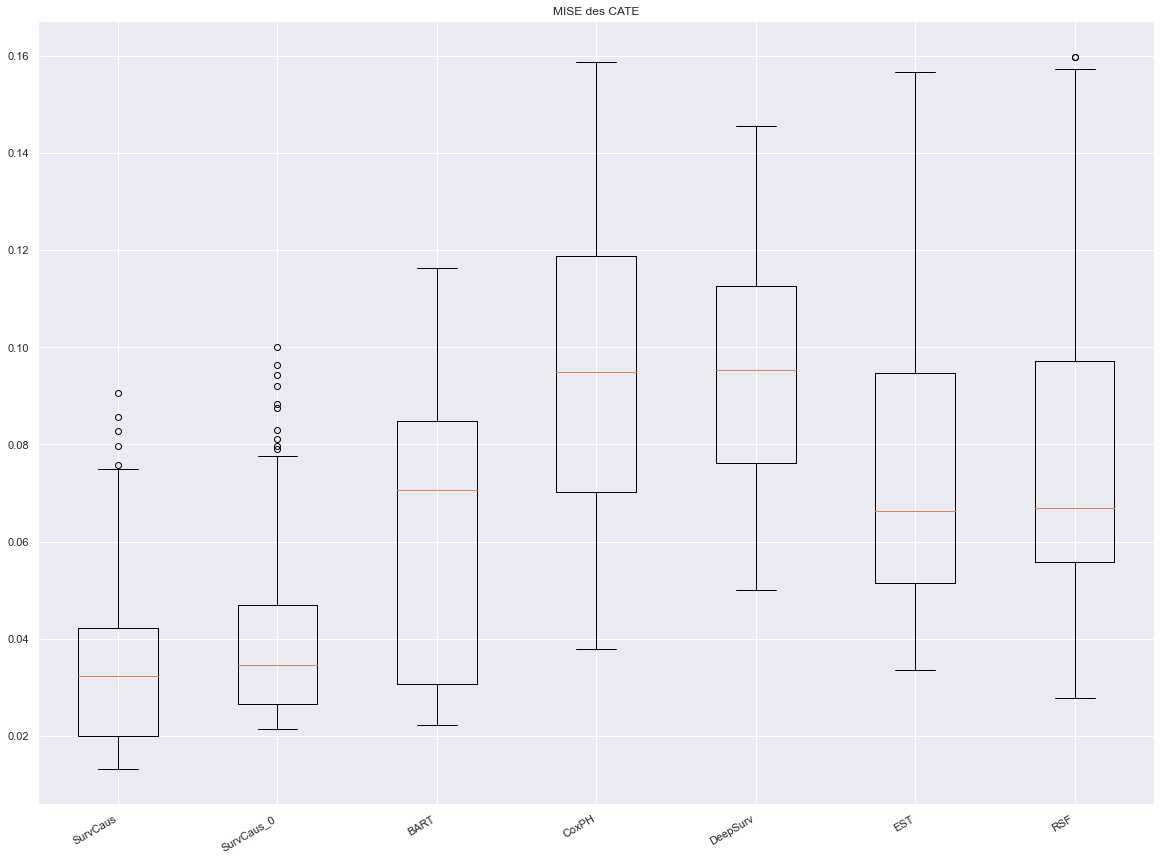

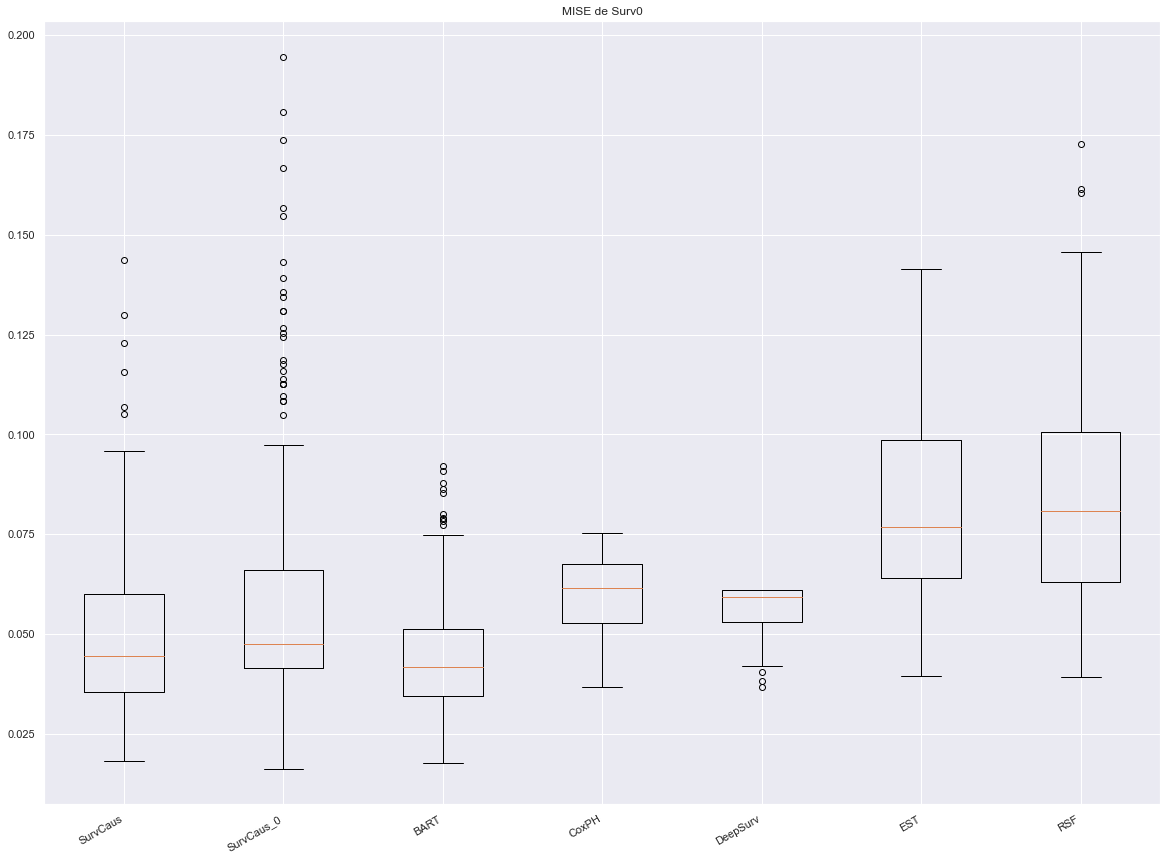

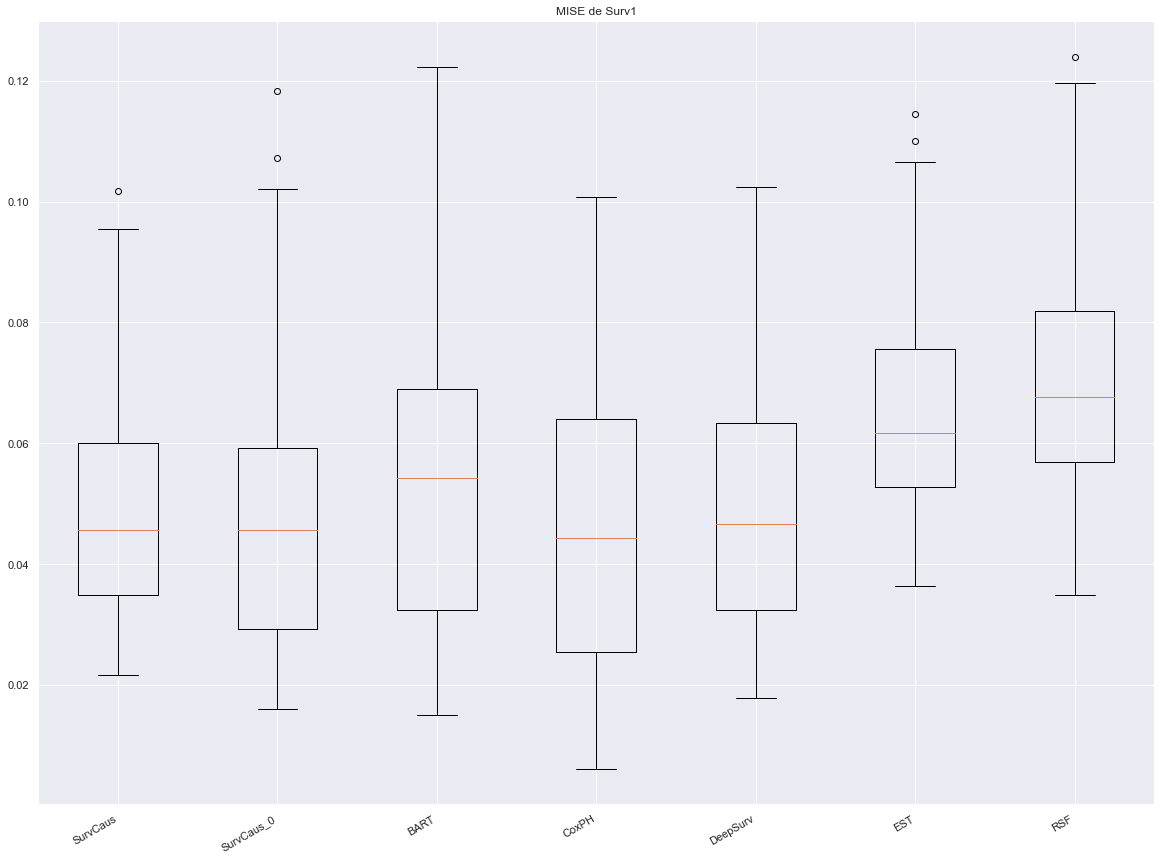

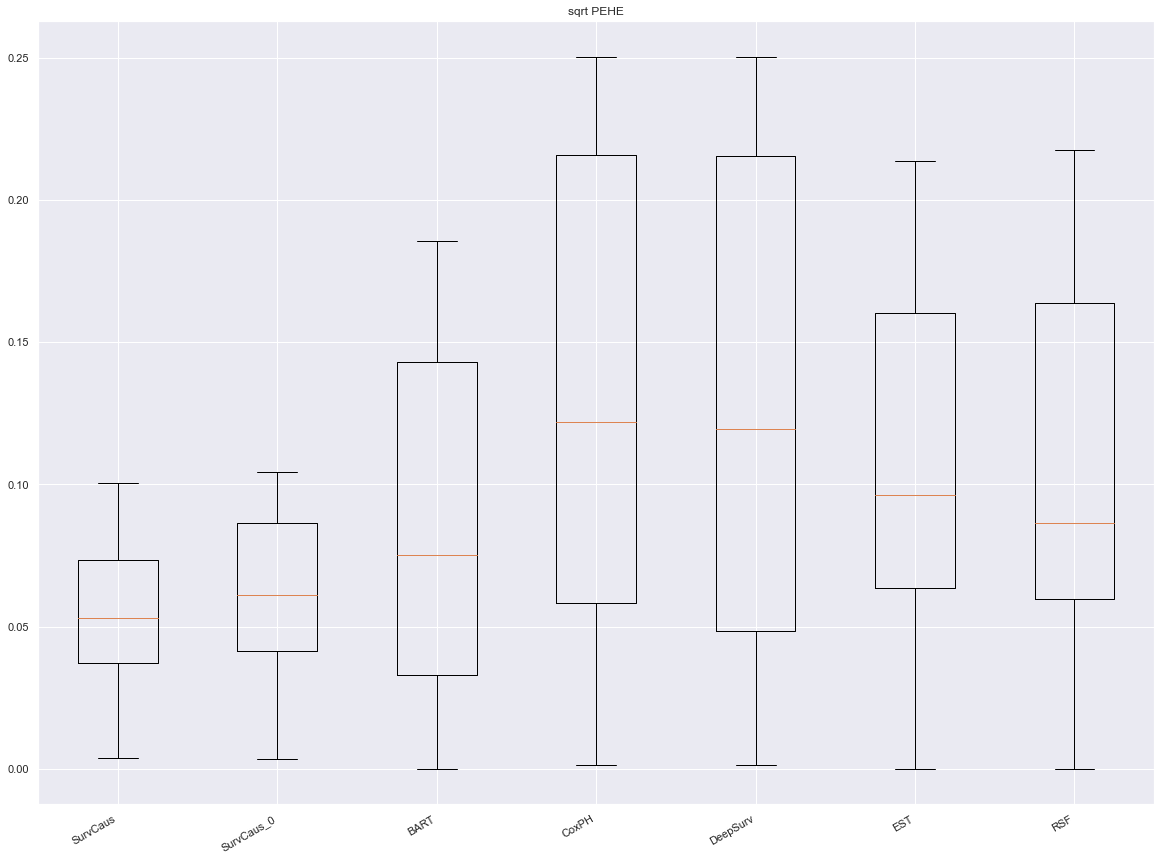

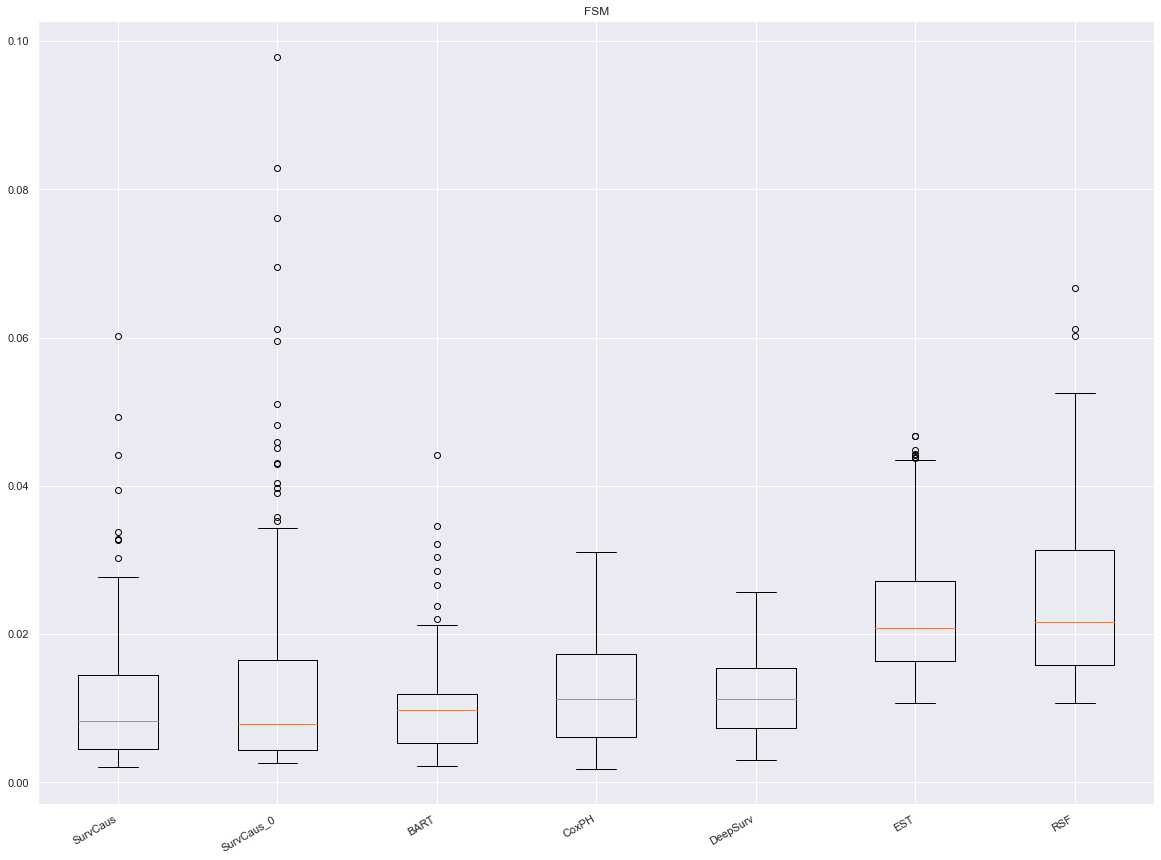

In [13]:
Ev.All_Results(list_models=list_models,
                        is_train=False,params_bart=p_bart_best)

# Benchmark

In [14]:
# Bilan of benchmark
nep.send_data(Ev.bilan_benchmark, "bilan_benchmark",num_run=0)
Ev.bilan_benchmark


,models,Mise0,Mise1,CATE,PEHE,FSM
0,SurvCaus,"(0.049, 0.022)","(0.048, 0.018)","(0.034, 0.017)","(0.055, 0.022)","(0.011, 0.009)"
1,SurvCaus_0,"(0.06, 0.034)","(0.045, 0.02)","(0.04, 0.018)","(0.062, 0.028)","(0.014, 0.015)"
2,BART,"(0.045, 0.015)","(0.052, 0.023)","(0.061, 0.029)","(0.088, 0.056)","(0.01, 0.006)"
3,CoxPH,"(0.06, 0.009)","(0.045, 0.023)","(0.095, 0.029)","(0.13, 0.081)","(0.012, 0.007)"
4,DeepSurv,"(0.056, 0.006)","(0.049, 0.019)","(0.095, 0.022)","(0.125, 0.083)","(0.012, 0.005)"
5,EST,"(0.083, 0.025)","(0.065, 0.017)","(0.074, 0.031)","(0.112, 0.055)","(0.023, 0.009)"
6,RSF,"(0.083, 0.028)","(0.07, 0.021)","(0.075, 0.029)","(0.111, 0.057)","(0.025, 0.011)"


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 600 samples in 0.001s...
[t-SNE] Computed neighbors for 600 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 600 / 600
[t-SNE] Mean sigma: 0.023162
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.773060
[t-SNE] KL divergence after 1000 iterations: 0.171213


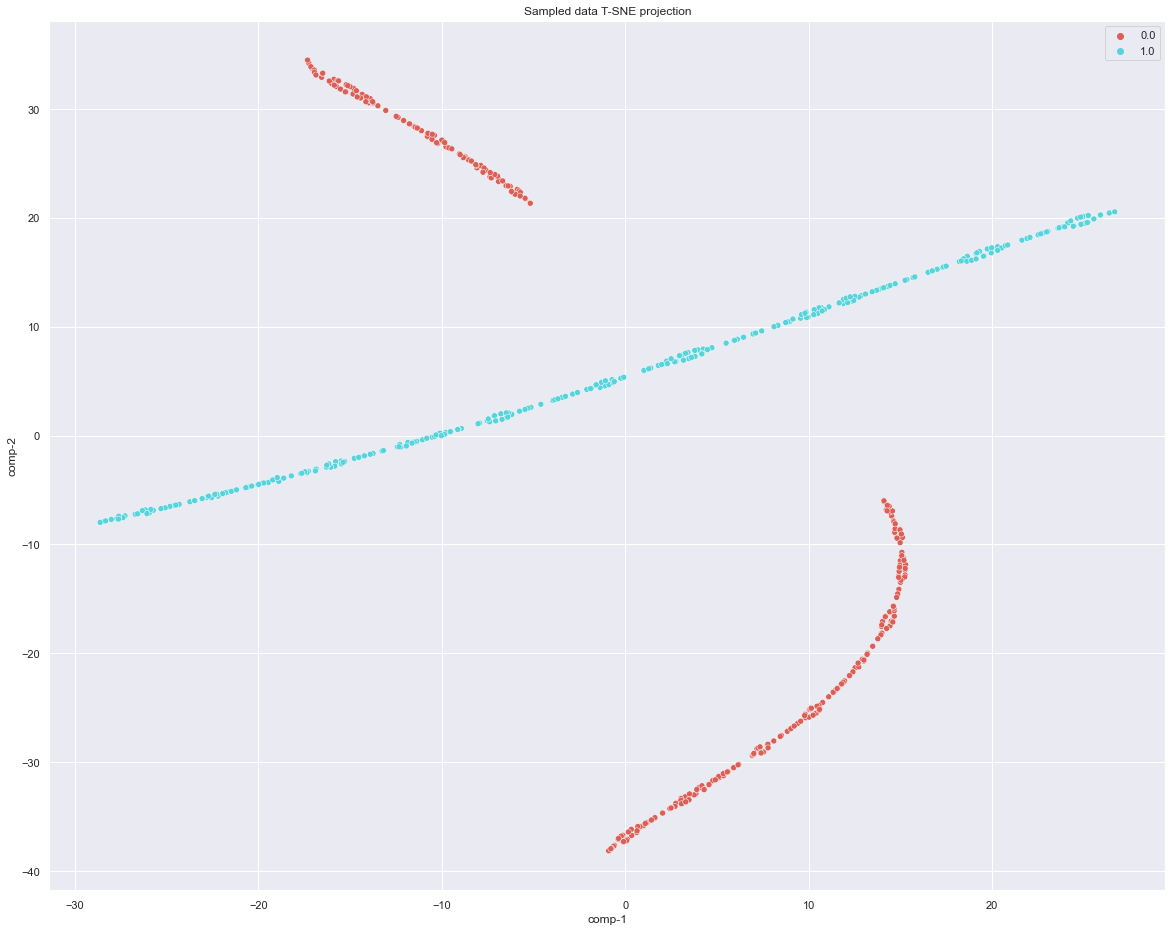

In [15]:
def get_repr(Ev):
    repr = Ev.SC.net.get_repr(torch.tensor(Ev.data.x_train))
    # repr to numpy
    repr = repr.detach().numpy()
    t = Ev.data.x_train[:,-1]
    return repr,t

def tsne_f(repr,t):
    tsne = TSNE(n_components=2, verbose=1, random_state=123)
    z = tsne.fit_transform(repr)
    d = pd.DataFrame()
    d["tt"] = t
    d["comp-1"] = z[:, 0]
    d["comp-2"] = z[:, 1]

    fig = plt.figure()
    sns.scatterplot(x="comp-1", y="comp-2", hue=d.tt.tolist(),
                palette=sns.color_palette("hls", 2),
                data=d).set(title="Sampled data T-SNE projection")
    plt.close()
    return fig
    
    
repres,t = get_repr(Ev)
tsne_survcaus_final = tsne_f(repres,t)

nep.send_plot(tsne_survcaus_final, "TSNE survcaus final",num_run=0)
tsne_survcaus_final

In [16]:
Ev.box_plot_cate
nep.send_plot(Ev.box_plot_cate, "box_plot_cate",num_run=0)


modifier S,
experiment
log - neptune
tables 
lancer :  wd, lin/nonlin, 
pas oublier brca !! 


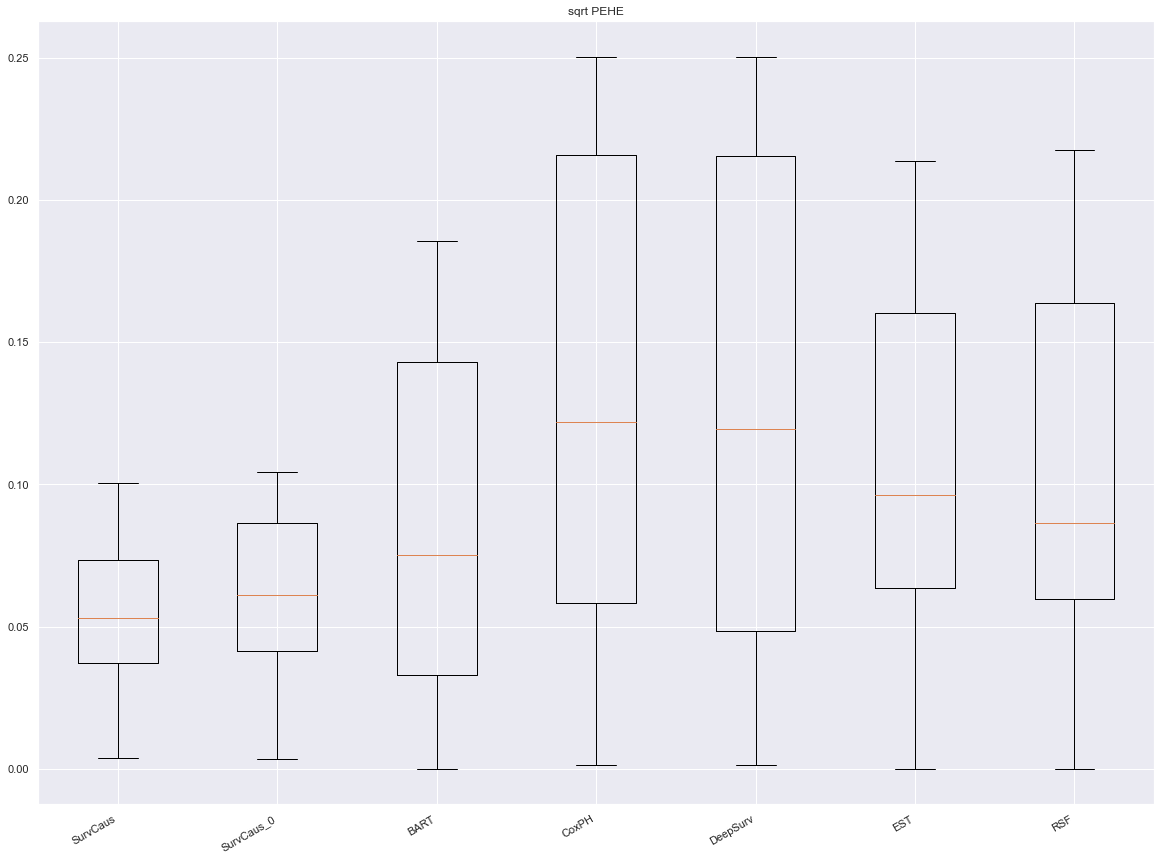

In [17]:
nep.send_plot(Ev.box_plot_pehe, "box_plot_pehe",num_run=0)
Ev.box_plot_pehe


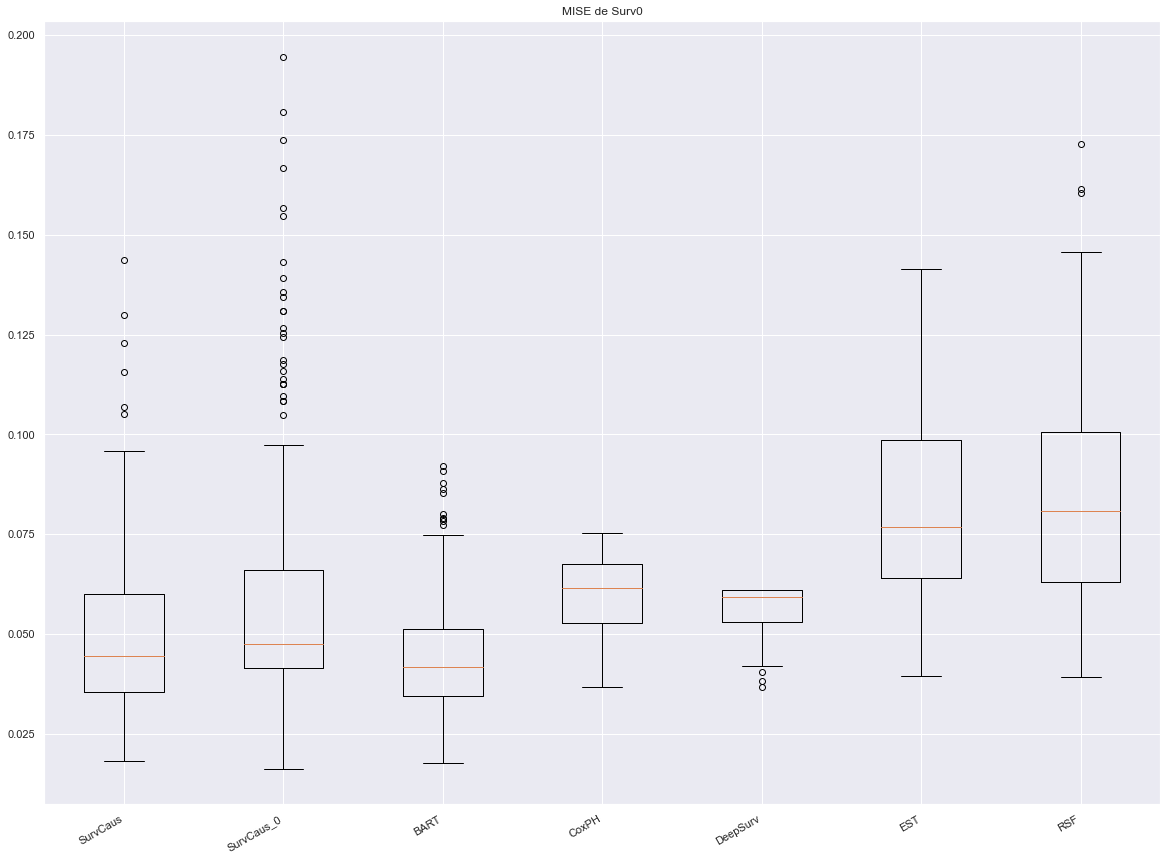

In [18]:
nep.send_plot(Ev.box_plot_surv0, "box_plot_surv0",num_run=0)
Ev.box_plot_surv0


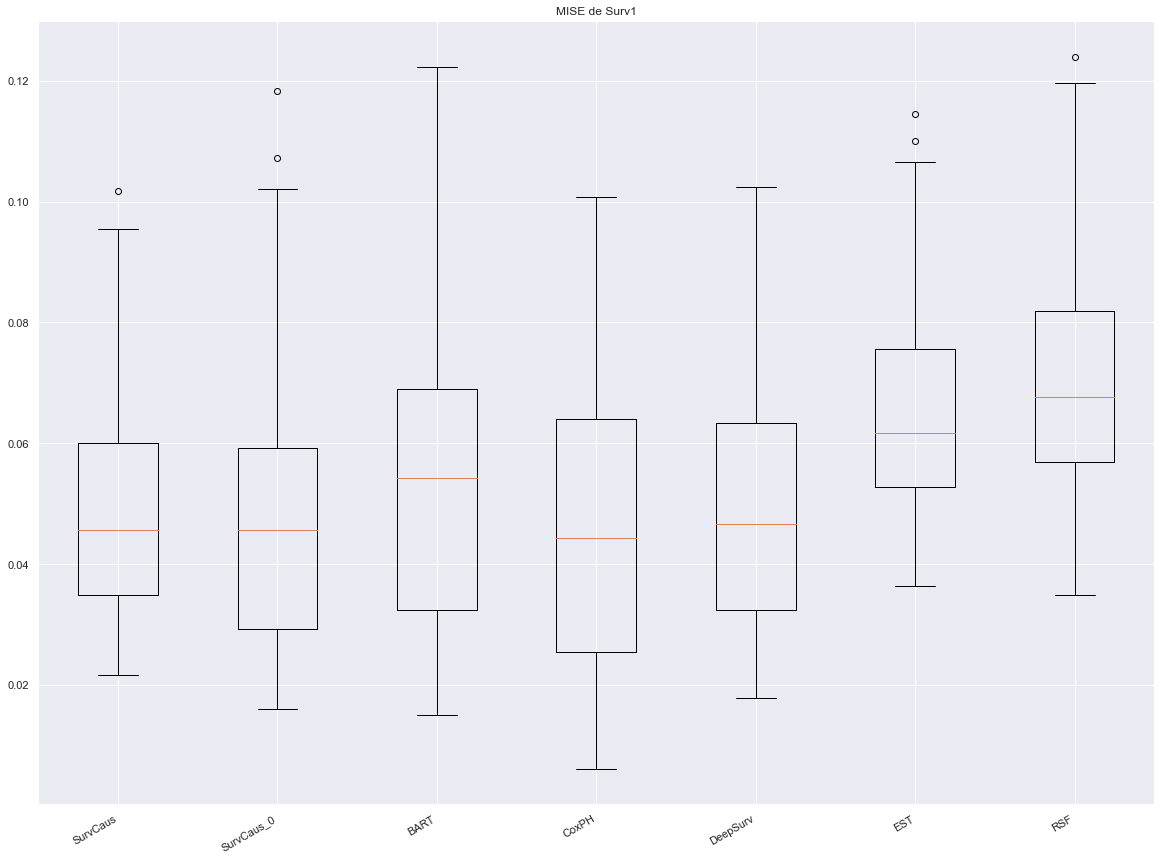

In [19]:
nep.send_plot(Ev.box_plot_surv1, "box_plot_surv1",num_run=0)
Ev.box_plot_surv1


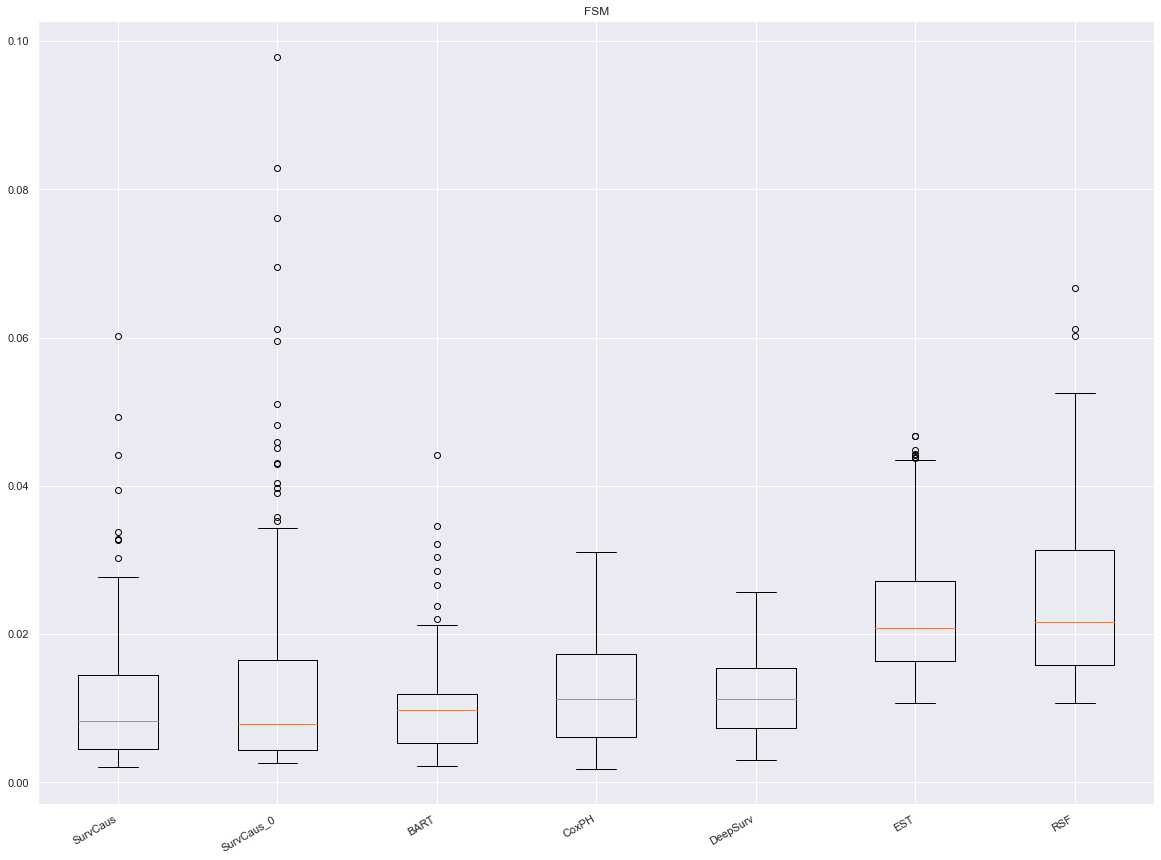

In [20]:
nep.send_plot(Ev.box_plot_FSM, "box_plot_FSM",num_run=0)
Ev.box_plot_FSM


(p_ours,p_bench) = (158, 158)
(p_ours,p_bench) = (158, 63)
(p_ours,p_bench) = (158, 7)
(p_ours,p_bench) = (158, 73)
(p_ours,p_bench) = (158, 73)
(p_ours,p_bench) = (158, 5)
(p_ours,p_bench) = (158, 81)


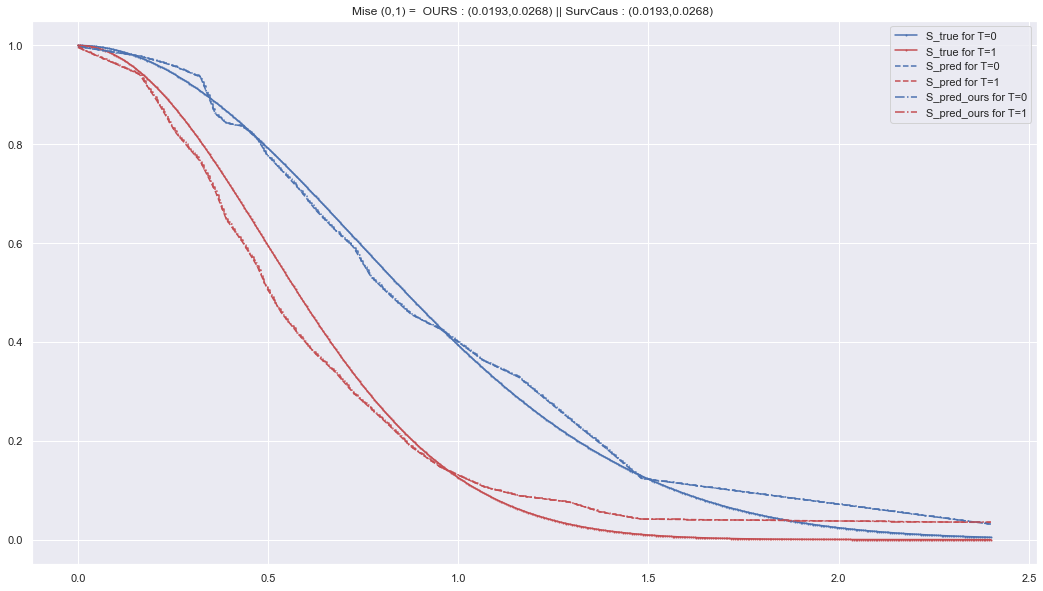

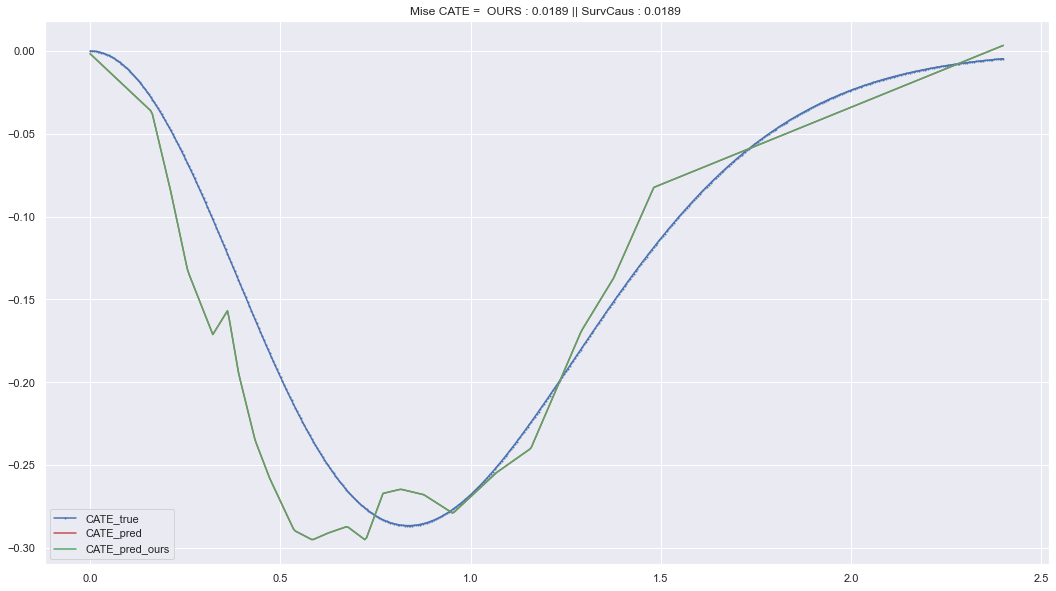

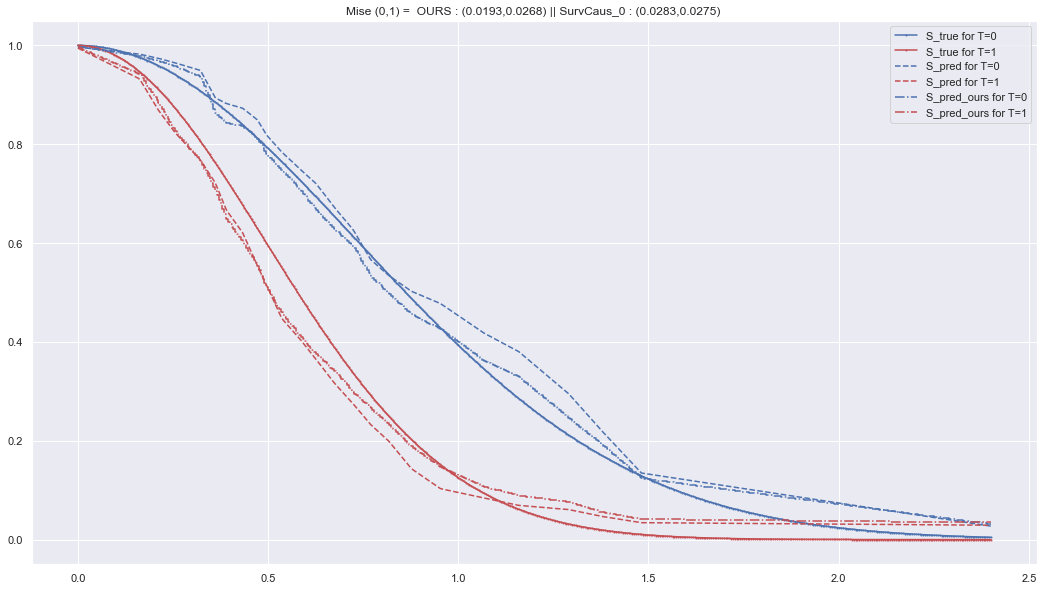

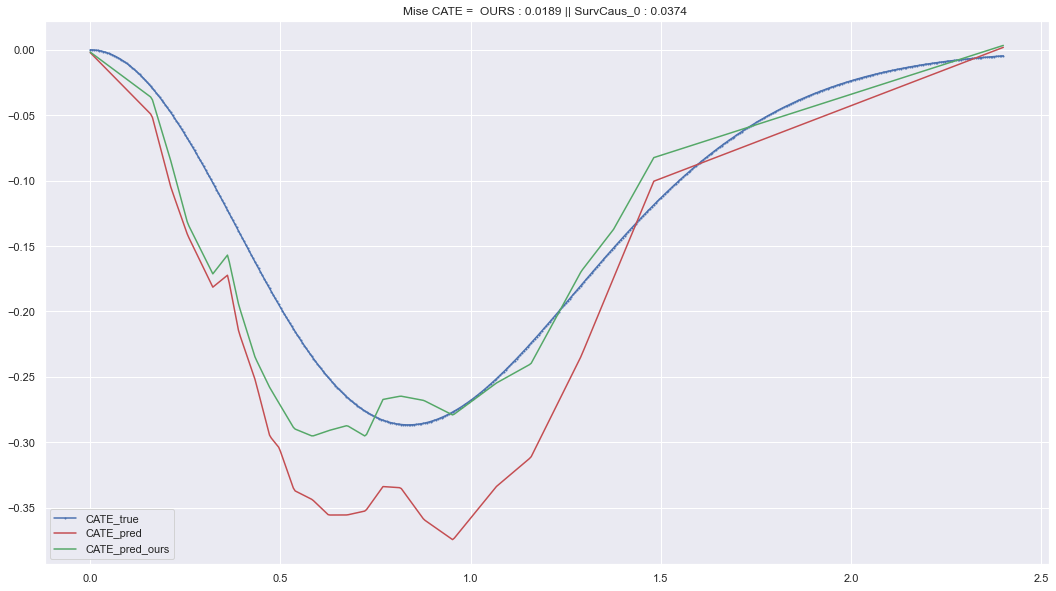

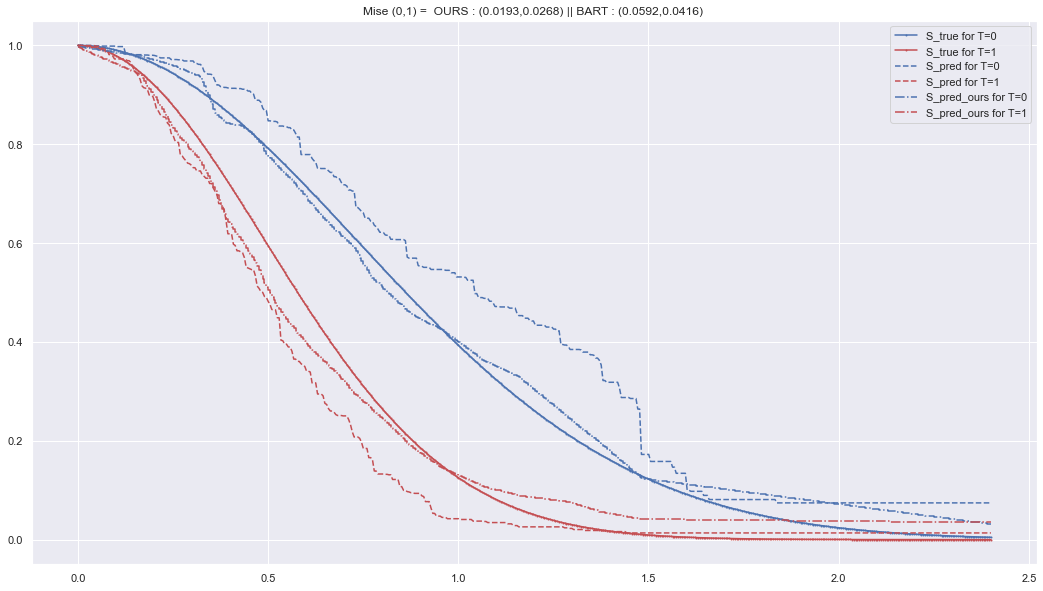

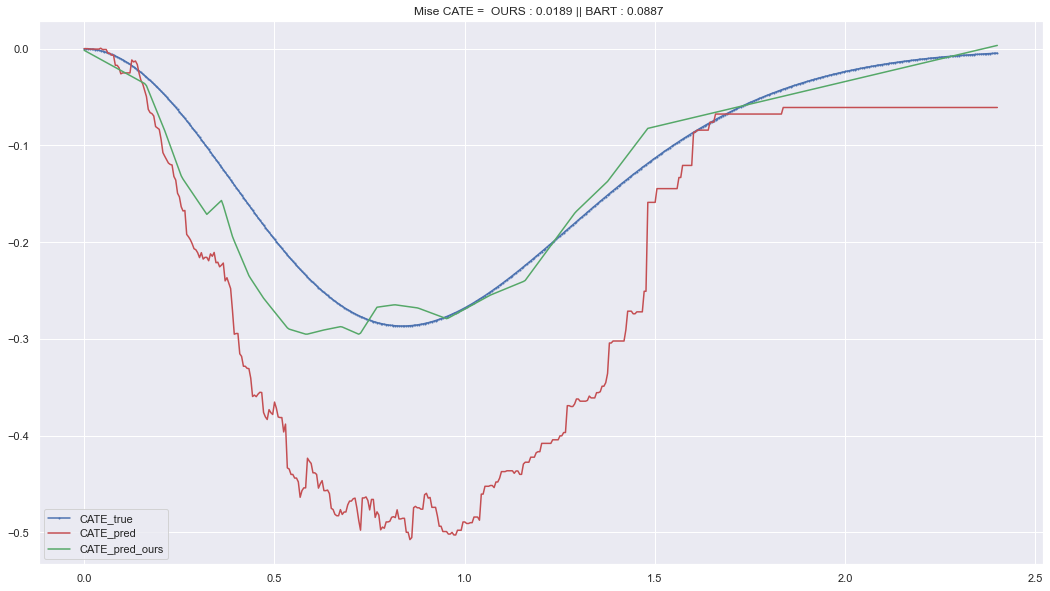

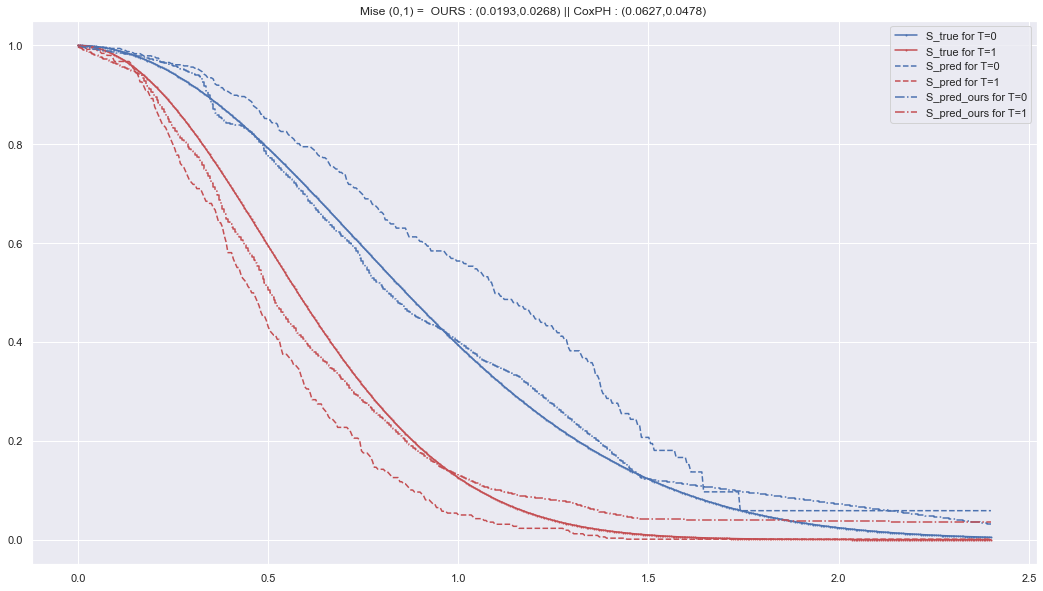

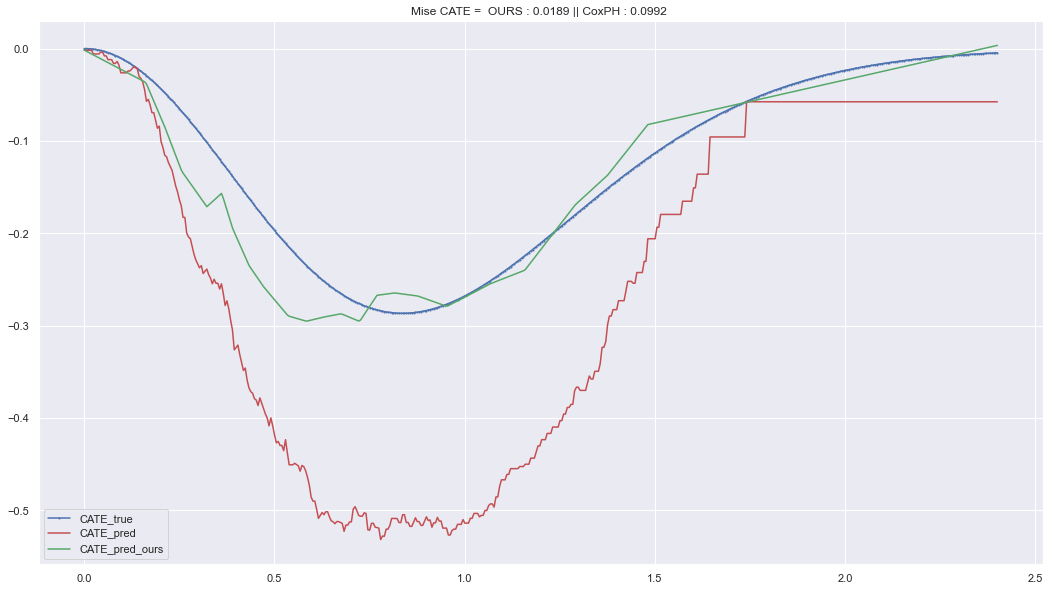

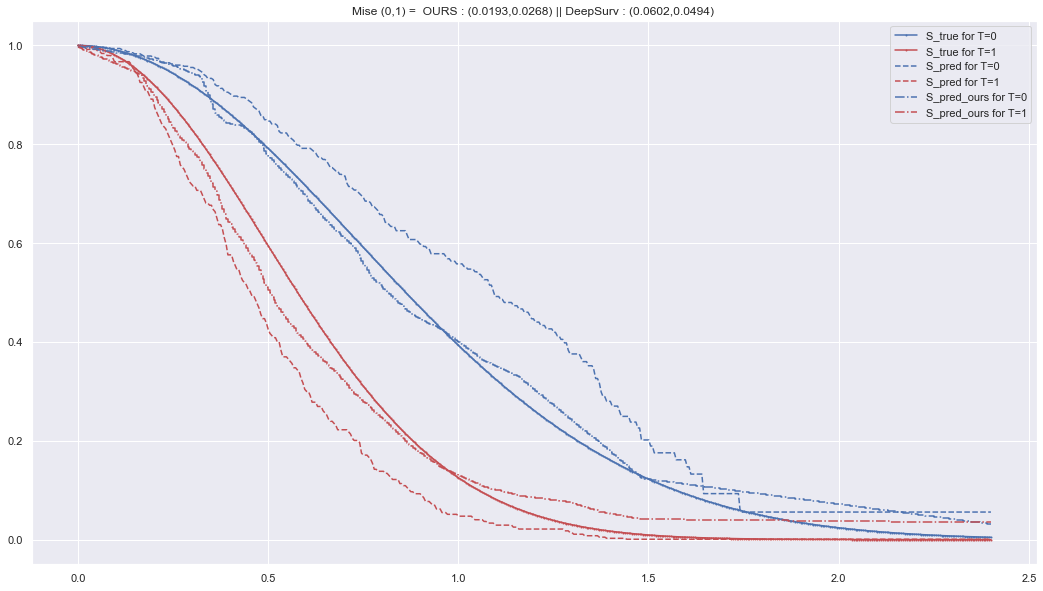

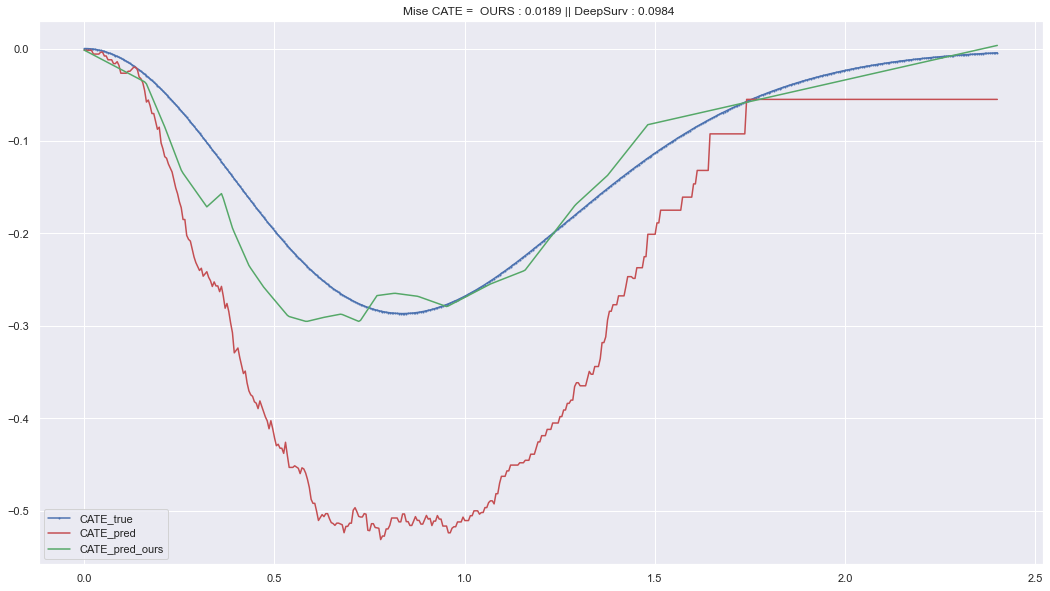

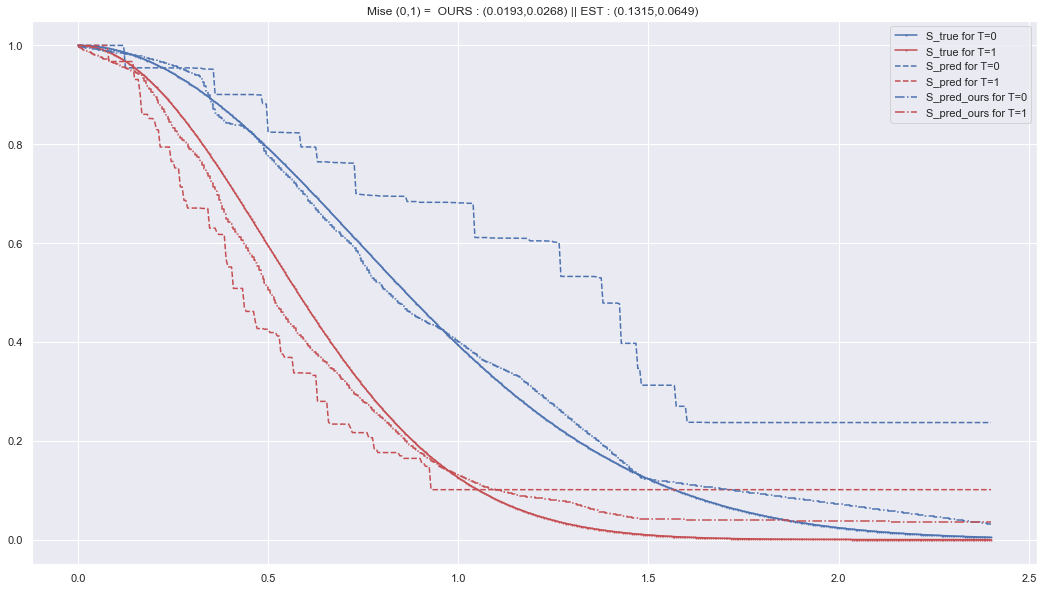

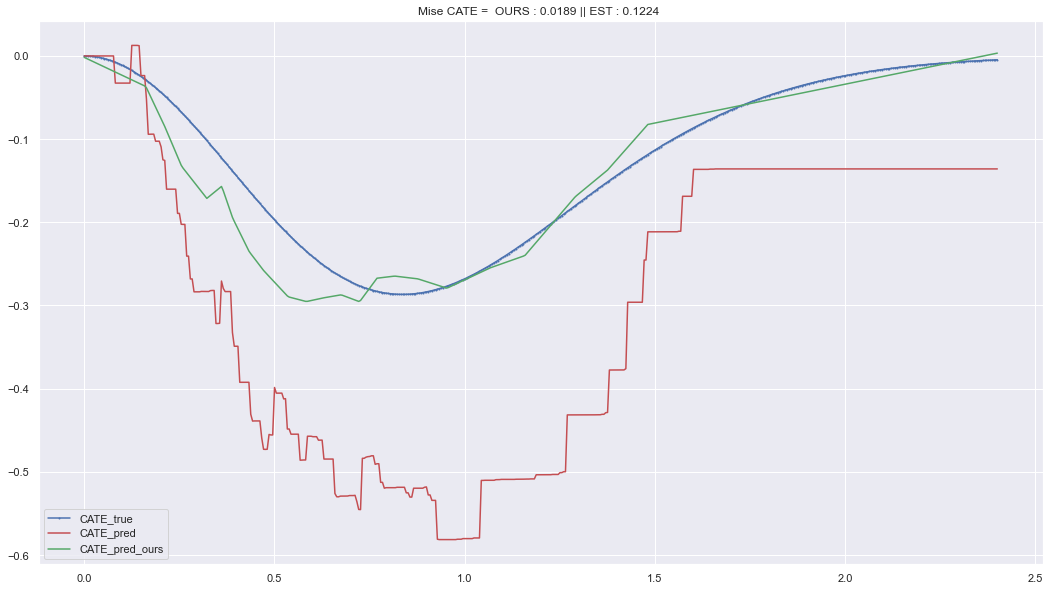

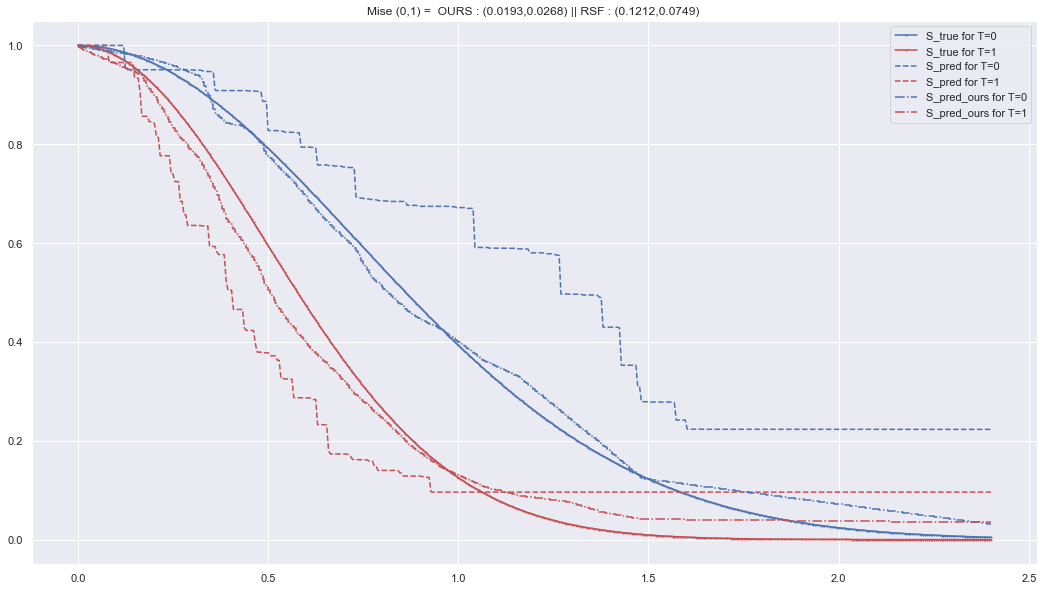

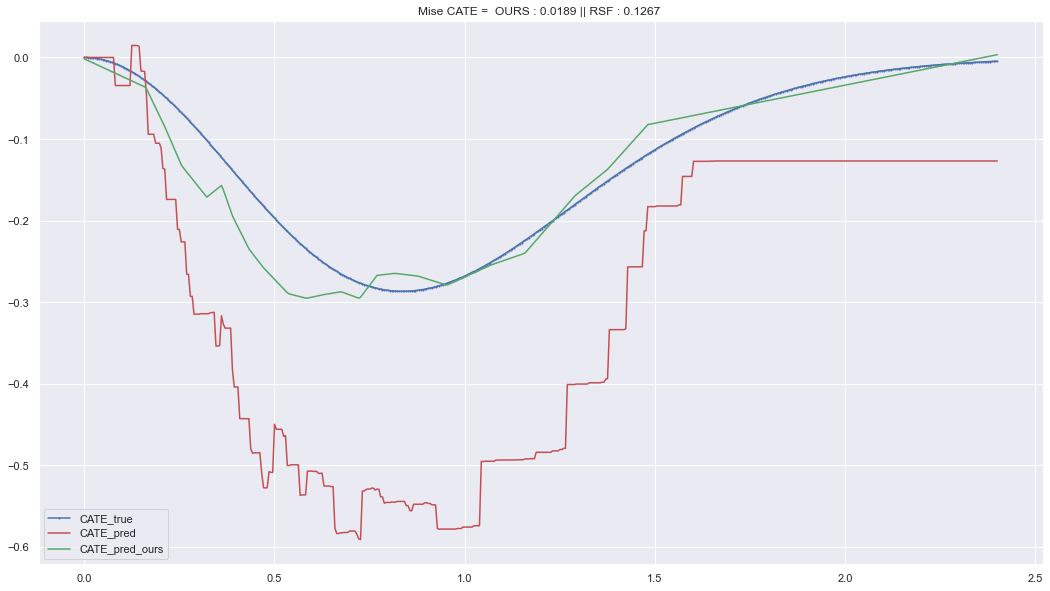

In [23]:

patient = 158
%matplotlib inline
d_q_all = {}
for model_name in Ev.list_models :
    fig_surv,fig_cate,d_q_model = plots(patient, Ev.d_list_models, model_name)
    d_q_all[model_name] = d_q_model
    nep.send_plot(fig_surv, "fig_surv_"+model_name,num_run=0)
    nep.send_plot(fig_cate, "fig_cate_"+model_name,num_run=0)


    



In [24]:

# dataframe of all the quantiles with the model name
df_q = pd.DataFrame(d_q_all)
nep.send_data(df_q, "df_q",num_run=0)
df_q


,SurvCaus,SurvCaus_0,BART,CoxPH,DeepSurv,EST,RSF
p,"[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]"
t*_0 true,"[1.57, 1.22, 0.99, 0.86, 0.55, 0.34]","[1.57, 1.22, 0.99, 0.86, 0.55, 0.34]","[1.57, 1.22, 0.99, 0.86, 0.55, 0.34]","[1.57, 1.22, 0.99, 0.86, 0.55, 0.34]","[1.57, 1.22, 0.99, 0.86, 0.55, 0.34]","[1.57, 1.22, 0.99, 0.86, 0.55, 0.34]","[1.57, 1.22, 0.99, 0.86, 0.55, 0.34]"
t*_0 pred,"[1.72, 1.28, 1.0, 0.81, 0.53, 0.34]","[1.78, 1.34, 1.11, 0.89, 0.58, 0.36]","[1.6, 1.47, 1.27, 1.04, 0.65, 0.46]","[1.65, 1.43, 1.28, 1.1, 0.68, 0.41]","[1.65, 1.43, 1.28, 1.09, 0.67, 0.4]","[1.66, 1.6, 1.43, 1.38, 0.71, 0.47]","[1.66, 1.57, 1.42, 1.27, 0.71, 0.48]"
dif_0,0.069642,0.111878,0.181934,0.188856,0.185068,0.331411,0.296873
t*_1 true,"[1.05, 0.82, 0.66, 0.58, 0.37, 0.23]","[1.05, 0.82, 0.66, 0.58, 0.37, 0.23]","[1.05, 0.82, 0.66, 0.58, 0.37, 0.23]","[1.05, 0.82, 0.66, 0.58, 0.37, 0.23]","[1.05, 0.82, 0.66, 0.58, 0.37, 0.23]","[1.05, 0.82, 0.66, 0.58, 0.37, 0.23]","[1.05, 0.82, 0.66, 0.58, 0.37, 0.23]"
t*_1 pred,"[1.1, 0.79, 0.6, 0.51, 0.33, 0.2]","[0.97, 0.75, 0.59, 0.51, 0.34, 0.19]","[0.86, 0.7, 0.54, 0.49, 0.3, 0.19]","[0.88, 0.66, 0.52, 0.46, 0.28, 0.19]","[0.87, 0.65, 0.52, 0.45, 0.28, 0.19]","[0.93, 0.66, 0.52, 0.41, 0.26, 0.16]","[0.93, 0.63, 0.47, 0.39, 0.25, 0.16]"
dif_1,0.04899,0.062716,0.115109,0.127932,0.133853,0.132602,0.15384
dif,0.059316,0.087297,0.148521,0.158394,0.15946,0.232007,0.225356
